In [93]:
%%capture

!pip install bs4
!pip install nbformat
!pip install pandas
!pip install geopandas
!pip install requests
!pip install --upgrade xlrd
!pip install openpyxl
!pip install seaborn

In [94]:
%%capture

%run ./Tidy.ipynb

# Comment expliquer la consommation et la légalisation du cannabis dans les différents pays européens ?

La question de la consommation de drogues est au cœur de nombreuses discussions en Europe, car elle soulève des enjeux importants, que ce soit pour la santé publique, la sécurité ou simplement la fracture sociale. Parmi ces substances, le cannabis attire particulièrement l’attention. C’est la drogue la plus utilisée, mais aussi l’une des rares à être légale ou dépénalisée dans certains pays, alors qu’elle reste interdite dans d’autres.

Nous avions initialement prévu d'étudier la consommation de plusieurs drogues en Europe. Finalement nous avons choisi de ne nous intéresser qu'à la consommation de cannabis et aux facteurs qui peuvent l’expliquer. Ce choix s’explique par deux raisons principales : d’abord, le cannabis est largement consommé, ce qui nous donne accès à une  quantité de données plus importante que pour les autres drogues. Ensuite, le fait que les lois sur le cannabis diffèrent d’un pays à l’autre nous permet d’étudier comment ces variations légales influencent la consommation.

Nous nous poserons donc au long de ce projet la question suivante : qu’est-ce qui explique les différences dans la consommation de cannabis en Europe, et quel rôle jouent les lois dans ces variations ? Ce sera le point de départ de notre analyse, qui cherche à mieux comprendre cette réalité complexe.

## 1 . Statistiques descriptives sur l'état de la consommation de cannabis en Europe

Afin de répondre au mieux à cette problématique, nous articulerons cette partie de statistiques descriptives en deux grands mouvements:

1. Un premier mouvement **purement descriptif** dans lequel nous ferons l'état des lieux de la consommation et de la législation du cannabis en Europe. Cela afin de poser des bases nécéssaires et d'évaluer la situation actuelle.

2. Un second mouvement **avec une vocation un peu plus explicative** ou nous tenterons cette fois de mettre en relation les données sur la consommation avec d'autres données à notre disposition (PIB, criminalité, etc...), ce afin de dégager des corrélations qui pourront nous être utiles par la suite lors de la phase de modélisation.

## 1.1 Premier état des lieux

Au-delà de la législation, nous considérons un certain nombre de variables comme pouvant avoir un impact sur la consommation, que nous recoupons en différentes catégories. 
En dehors d'un panorama général de la consommation, cibler une partie de notre analyse sur les jeunes, (ici 15-34 ans), parait particulièrement pertinent dans la mesure où les jeunes sont plus exposés à la consommation de cannabis, à la fois par un effet et par un effet de génération. C'est-à-dire que les jeunes sont plus susceptibles de consommer, mais aussi que la consommation s'est sans doute banalisée récemment, et donc que la jeune génération y est plus exposée.

Je m'appuie sur la table dfcurrent. Cette table est très complète et présente pour différentes tranches d'âge de la population européenne, des données de consommation pour un ensemble de drogues qui précisent sa périodicité. 
Pour correspondre à notre étude, nous avons restreint cette table à l'étude du cannabis, puis à la catégorie "Lifetime" qui décrit le fait que les personnes aient déjà consommé une fois au cours de leur vie, tout en séparant la population selon deux catégorisations d'âge. D'un côté la population adulte générale, et d'un autre côté les jeunes de 15 à 34 ans. 

In [95]:
df = pd.read_csv('~/work/Projet_Python_2A/Data/EUDA/edr2024-gps-current-table-1.csv')

dfcurrent = df[df['Substance'] == 'Cannabis']

dfcurrentadults = dfcurrent[dfcurrent['Age'] == 'All adults (15-64)']

dfcurrentadultslf = dfcurrentadults[dfcurrentadults['Recall period'] == 'Lifetime']

print(dfcurrentadultslf.describe())

       Survey year  Prevalence (%)   Sample size  Males (%)  Females (%)
count    29.000000       29.000000     25.000000  29.000000    29.000000
mean   2019.896552       21.524138   6105.680000  26.620690    16.524138
std       2.365599       11.388674   5588.875228  12.834646    10.123616
min    2013.000000        2.700000   1385.000000   5.400000     0.200000
25%    2019.000000       12.200000   3013.000000  17.500000     7.700000
50%    2020.000000       22.700000   4011.000000  27.800000    16.900000
75%    2022.000000       28.800000   7200.000000  34.100000    22.900000
max    2023.000000       47.300000  26344.000000  54.900000    39.900000


Le pourcentage d'adultes qui déclarent avoir déjà consommé du cannabis une fois dans leur vie serait donc de 21,5% en moyenne par pays. Le pays dans laquelle cette consommation est la plus rare est la Turquie avec 2,7% et celui dans laquelle la consommation est la plus haute est la France avec 47,3%.

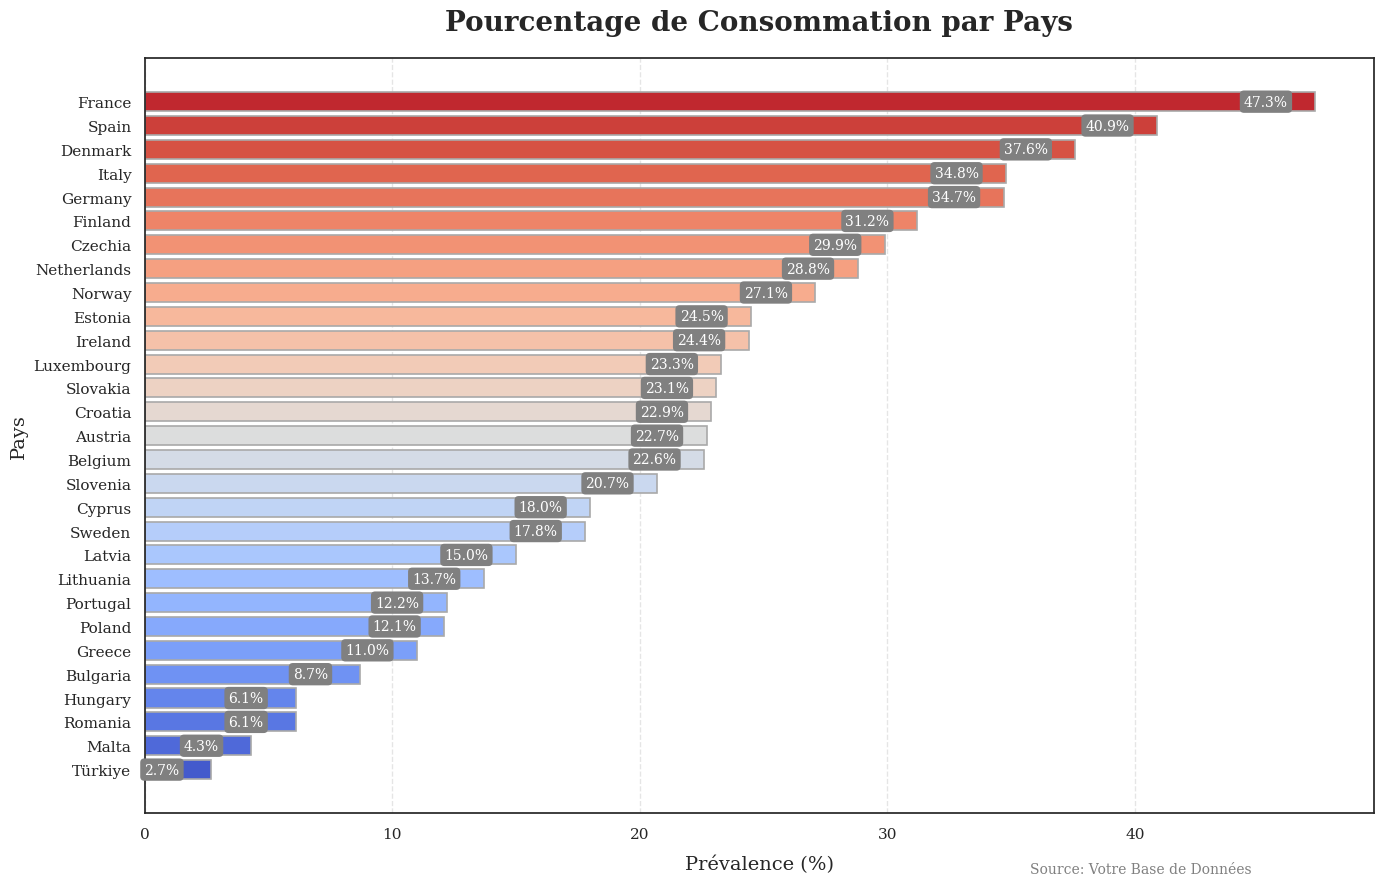

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trier le DataFrame par ordre décroissant de la colonne 'Prevalence (%)'
df_sorted = dfcurrentadultslf.sort_values(by='Prevalence (%)', ascending=False)

# Extraction des données triées
countries = df_sorted['Country']
prevalence = df_sorted['Prevalence (%)']

# Initialisation du style et du graphique
sns.set_theme(style="white", palette="muted", font="serif") 
plt.figure(figsize=(14, 9))  

# Création du graphique en barres horizontales
bars = plt.barh(countries, prevalence, color=sns.color_palette("coolwarm_r", len(countries)), edgecolor='darkgray', linewidth=1.2)

# Inverser l'ordre des pays pour correspondre au tri décroissant
plt.gca().invert_yaxis()

# Ajout des titres et labels stylisés
plt.title('Pourcentage de Consommation par Pays', fontsize=20, weight='bold', pad=20)
plt.xlabel('Prévalence (%)', fontsize=14, labelpad=10)
plt.ylabel('Pays', fontsize=14)

# Affichage des valeurs sur les barres avec des bulles arrondies
for bar, value in zip(bars, prevalence):
    plt.text(bar.get_width() - 2,                
             bar.get_y() + bar.get_height() / 2, 
             f"{value:.1f}%",                   
             ha='center', va='center', 
             color='white', fontsize=10, 
             bbox=dict(facecolor='gray', edgecolor='none', boxstyle='round,pad=0.3'))  

# Personnalisation des axes
plt.tick_params(axis='both', which='major', labelsize=11)  
plt.grid(axis='x', linestyle='--', alpha=0.5)             

# Ajustement des marges pour un meilleur rendu
plt.tight_layout()

# Ajout d'une légende
plt.figtext(0.9, 0.02, 'Source: Votre Base de Données', ha='right', fontsize=10, color='gray')

# Affichage
plt.show()


Nous retrouvons avec ce graphique l'écart important entre la France et la Turquie (Türkiye). La visualisation des données sur ce graphique nous amène à un certain nombre de questionnements sur les écarts de consommation entre les différents pays européens et notamment entre les pays qui ont des écarts de consommation importants malgré des caractéristiques socio-économiques, voire culturelles proches. Par exemple, on observe un écart de 27 points de pourcentage entre la prévalence en France et en Belgique (Belgium), alors même que ces deux pays sont voisins, partagent une langue commune, et des caractéristiques socio-économiques similaires. 
Pour prendre un autre exemple, nous allons nous intéresser aux pays baltes. Il ne parait pas irréaliste de prétendre que la Lettonie (Latvia), la Lituanie (Lithuania) et l'Estonie (Estonia) peuvent être comparés de manière pertinente. Si le pourcentage de prévalence est quasiment le même entre la Lettonie et la Lituanie, entre 14 et 15%, il est de 24,5% en Estonie.
On doit s'interroger sur les paramètres qui peuvent expliquer ces différences alors que dans une première approche naïve, on peut considérer que ces pays ont des caractéristiques très proches. 

Pour améliorer la visualisation de nos données, nous réalisons une carte choroplèthe de la prévalence en Europe.

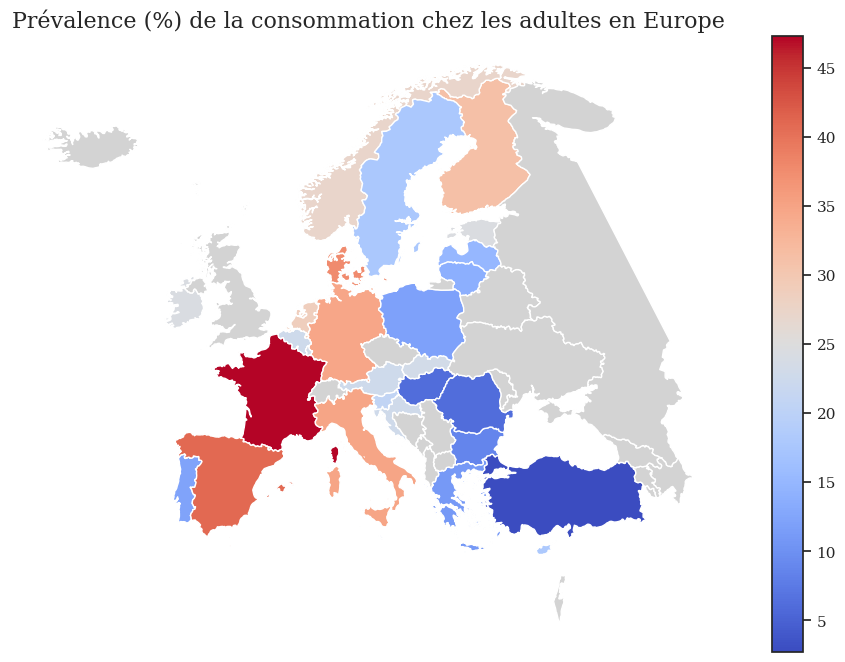

In [97]:
import pandas as pd
import geopandas as gpd

# Charger le fond de carte de l'Europe
europe_map = gpd.read_file("https://raw.githubusercontent.com/leakyMirror/map-of-europe/master/GeoJSON/europe.geojson")

#Je recode le nom de la Turquie pour qu'il corresponde dnas les deux bases
dfcurrentadultslf['Country'] = dfcurrent['Country'].replace('Türkiye', 'Turkey')

europe_map = europe_map.rename(columns={'NAME': 'Country'})

# Fusionner le fond de carte avec les données
merged = europe_map.merge(dfcurrentadultslf, on="Country", how="left")

# Créer une carte choroplèthe
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column="Prevalence (%)", cmap="coolwarm", legend=True, ax=ax, missing_kwds={
    "color": "lightgrey",
    "label": "No data"
})
ax.set_title("Prévalence (%) de la consommation chez les adultes en Europe", fontsize=16)
ax.axis("off")
plt.show()


### La consommation chez les 15-34 ans

Nous voulons désormais réaliser des analyses comparables, mais en considérant uniquement la tranche d'âge des 15-34 ans, qui sont probablement plus exposés à cette consommation. On crée donc une table "dfcurrentyoung". 

In [98]:
dfcurrentyoung = dfcurrent[dfcurrent['Age'] == 'Young adults (15-34)']

dfcurrentyounglf = dfcurrentyoung[dfcurrentyoung['Recall period'] == 'Lifetime']

print(dfcurrentyounglf.describe())

       Survey year  Prevalence (%)  Sample size  Males (%)  Females (%)
count    28.000000       28.000000     25.00000  27.000000    27.000000
mean   2020.142857       29.935714   2214.92000  35.129630    24.874074
std       1.994702       13.229798   2262.94548  14.702873    12.759027
min    2015.000000        3.900000    442.00000   7.300000     0.400000
25%    2019.000000       21.950000    927.00000  25.700000    15.050000
50%    2020.000000       32.450000   1627.00000  36.600000    27.600000
75%    2022.000000       39.975000   2550.00000  46.650000    32.750000
max    2023.000000       54.500000  11495.00000  60.400000    48.800000


Le pourcentage de 15-34 ans qui déclarent avoir consommé du cannabis au moins une fois dans leur vie est donc de 29,9% par pays, soit 8 points de pourcentage de plus que pour la population générale. Les valeurs extrêmes sont également plus élevées, même si elles concernent toujours la Turquie et la France. L'hypothèse selon laquelle la consommation est sujette à un effet d'âge semble valide. Davantage de jeunes de 15-34 ans déclarent, dans tous les pays, avoir consommé du cannabis une fois dans leur vie par rapport à la population générale. Cet écart est d'autant plus important que cette catégorie d'âge est intégrée à la population générale et donc quelle contribue à augmenter la valeur de la prévalence dans la population générale. Si l'on comparait la prévalence des 15-34 ans à celle des 34-64 ans, on aurait donc un écart plus grand. 

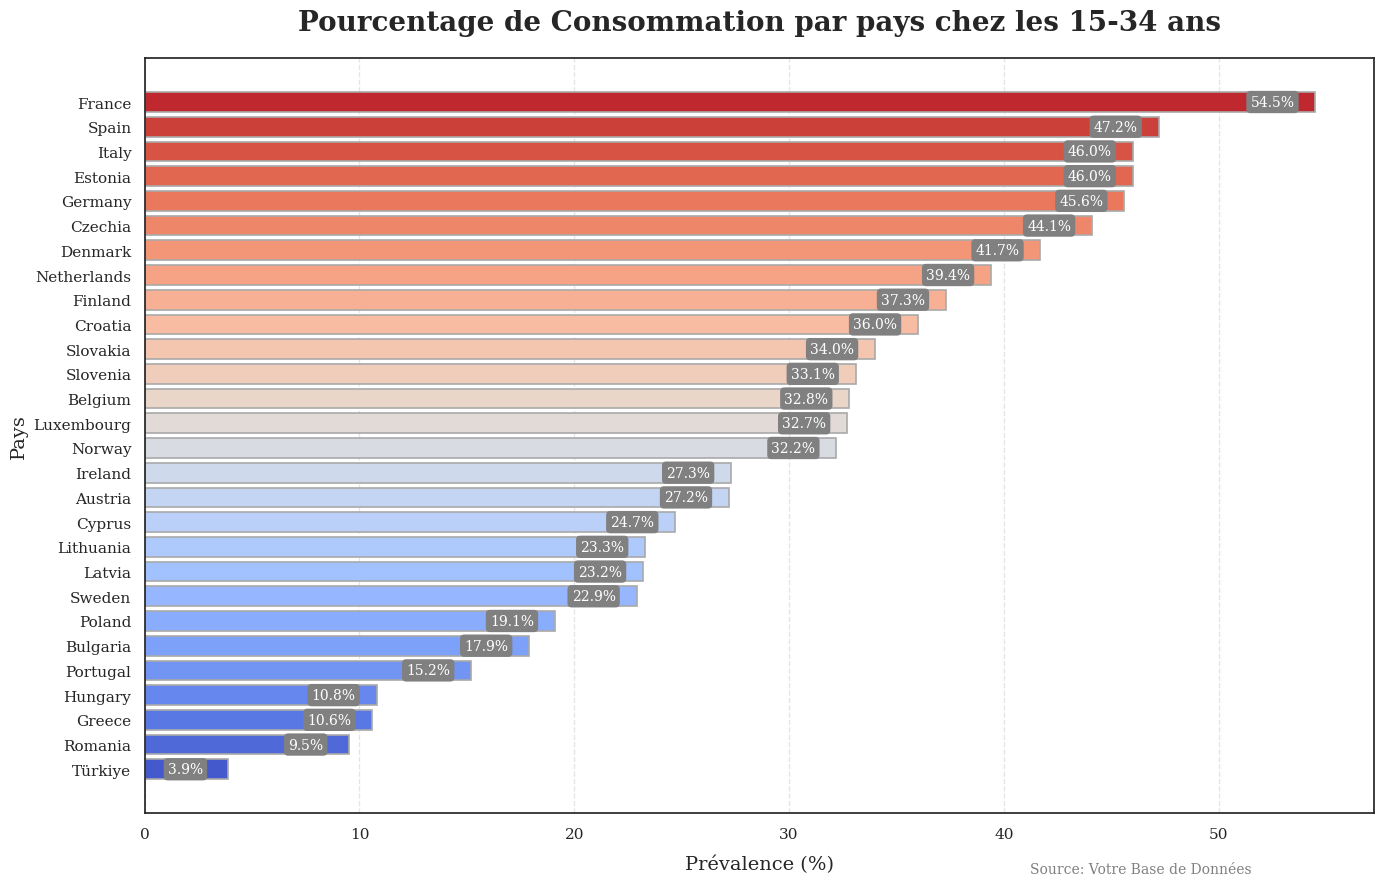

In [99]:
# Trier le DataFrame par ordre décroissant de la colonne 'Prevalence (%)'
df_sorted = dfcurrentyounglf.sort_values(by='Prevalence (%)', ascending=False)

# Extraction des données triées
countries = df_sorted['Country']
prevalence = df_sorted['Prevalence (%)']

# Initialisation du style et du graphique
sns.set_theme(style="white", palette="muted", font="serif") 
plt.figure(figsize=(14, 9))  

# Création du graphique en barres horizontales
bars = plt.barh(countries, prevalence, color=sns.color_palette("coolwarm_r", len(countries)), edgecolor='darkgray', linewidth=1.2)

# Inverser l'ordre des pays pour correspondre au tri décroissant
plt.gca().invert_yaxis()

# Ajout des titres et labels stylisés
plt.title('Pourcentage de Consommation par pays chez les 15-34 ans', fontsize=20, weight='bold', pad=20)
plt.xlabel('Prévalence (%)', fontsize=14, labelpad=10)
plt.ylabel('Pays', fontsize=14)

# Affichage des valeurs sur les barres avec des bulles arrondies
for bar, value in zip(bars, prevalence):
    plt.text(bar.get_width() - 2,                
             bar.get_y() + bar.get_height() / 2, 
             f"{value:.1f}%",                   
             ha='center', va='center', 
             color='white', fontsize=10, 
             bbox=dict(facecolor='gray', edgecolor='none', boxstyle='round,pad=0.3'))  

# Personnalisation des axes
plt.tick_params(axis='both', which='major', labelsize=11)  
plt.grid(axis='x', linestyle='--', alpha=0.5)             

# Ajustement des marges pour un meilleur rendu
plt.tight_layout()

# Ajout d'une légende
plt.figtext(0.9, 0.02, 'Source: Votre Base de Données', ha='right', fontsize=10, color='gray')

# Affichage
plt.show()

Ce graphique confirme que la prévalence est plus élevée pour chacun des pays pour les 15-34 ans par rapport à la population générale. Si on reprend les pays que nous avons utilisés dans notre première comparaison, il y a toujours un écart de 20 points de pourcentage entre la France et la Belgique. En ce qui concerne les pays baltes, nous avons un schéma également similaire à la population générale, la Lettonie et la Lituanie possédant des pourcentages de prévalence très proches, alors que l'écart avec l'Estonie est encore accru. 

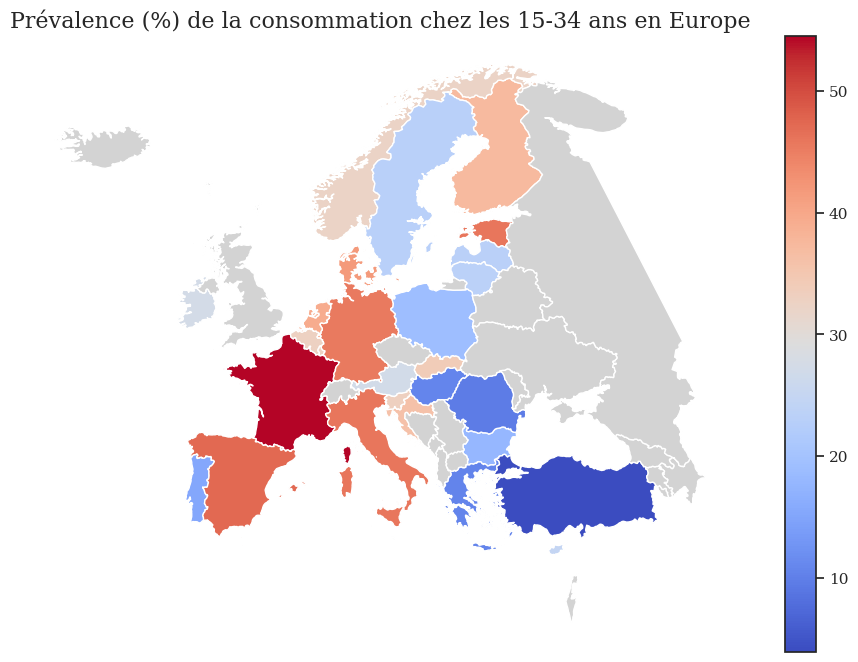

In [100]:
# Charger le fond de carte de l'Europe
europe_map = gpd.read_file("https://raw.githubusercontent.com/leakyMirror/map-of-europe/master/GeoJSON/europe.geojson")

europe_map = europe_map.rename(columns={'NAME': 'Country'})

#Je recode le nom de la Turquie pour qu'il corresponde dnas les deux bases
dfcurrentyounglf['Country'] = dfcurrent['Country'].replace('Türkiye', 'Turkey')


# Fusionner le fond de carte avec les données
merged = europe_map.merge(dfcurrentyounglf, on="Country", how="left")


# Créer une carte choroplèthe
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column="Prevalence (%)", cmap="coolwarm", legend=True, ax=ax, missing_kwds={
    "color": "lightgrey",
    "label": "No data"
})
ax.set_title("Prévalence (%) de la consommation chez les 15-34 ans en Europe", fontsize=16)
ax.axis("off")
plt.show()

Pour résumer les premières observations que nous avons fait dans cette partie, nous avons remarqué dans notre première phase d'analyse des différences de prévalence entre des pays que nous considérons comme possédant des caractéristiques socio-économiques similaires. Ces différences peuvent aller du simple au double dans le cas des pays baltes. Deux directions semblent intéressantes pour avancer dans notre problématique. Soit tenter dans un premier temps d'expliquer ces différences par des différences qui n'auraient pas à voir avec les caractéristiques socio-économiques, ce que nous allons faire dans notre analyse portant sur les différences de législation. Ou alors dans un second temps d'expliquer ces différences par des données plus fines sur les caractéristiques socio-économiques, au-delà d'a priori naïfs. 

#### 1.1.2 L'impact de la législation

Nous allons commencer par nous intéresser à la législation dans les pays européens, à partir des données scrapées sur wikipédia. 

In [101]:
legal_pays_clean = legal_pays_clean.reset_index()
legal_pays_clean.rename(columns={'index': 'Country'}, inplace=True)

legal_pays_clean.head()

,Country,Recreational,Medical
0,Austria,Decriminalized,Legal
1,Belgium,Decriminalized,Legal
2,Bulgaria,Illegal,Illegal
3,Croatia,Decriminalized,Legal
4,Cyprus,Illegal,Legal


Nous allons créer une carte permettant de visualiser l'état de la légalisation en Europe. Les pays dans lesquels sa consommation récréative est illégale seront représentés en rouge, ceux dans lesquels la consommation récréative est légale seront représentés en vert, et enfin ceux dans lesquels cette consommation est décriminalisée seront représentés en bleu. 

Pour ces 3 catégories, précisons le cadre légal. 
Illégal : la consommation est interdite et sanctionnée par la loi 
Légal : La consommation est autorisée
Décriminalisée : La consommation de cannabis n'est plus considérée comme un crime. La consommation peut donc être sanctionnée, mais plus modérément. 

In [102]:
import folium
import geopandas as gpd

# Charger les données géographiques des pays d'Europe depuis le fichier téléchargé
world = gpd.read_file("~/work/Projet_Python_2A/Data/ne_110m_admin_0_countries.shp")

# Filtrer pour ne garder que les pays européens
europe = world[(world['CONTINENT'] == 'Europe') | (world['NAME'] == 'Turkey')]

#Renommer la Turquie pour la faire correspondre
legal_pays_clean['Country'] = legal_pays_clean['Country'].replace('Türkiye', 'Turkey')

# Créez la carte
m = folium.Map(location=[54.5260, 15.2551], zoom_start=4, tiles='CartoDB positron')

# Définir une fonction pour colorier les pays selon la modalité de la variable 'Recreational'
def get_color(value):
    if value == "Legal":
        return "green"
    elif value == "Illegal":
        return "red"
    elif value == "Decriminalized":
        return "blue"
    else:
        return "gray"

# Ajouter un geoJSON des pays à la carte
for _, row in europe.iterrows():
    country_name = row['NAME']
    country_data = legal_pays_clean[legal_pays_clean['Country'] == country_name]
    
    if not country_data.empty:
        recreational_status = country_data['Recreational'].values[0]
    else:
        recreational_status = None

    folium.GeoJson(
        row['geometry'],
        style_function=lambda x, recreational_status=recreational_status: {
            'fillColor': get_color(recreational_status),
            'fillOpacity': 0.7,
            'weight': 0.5,
            'color': 'black'
        }
    ).add_to(m)

# Afficher la carte 
m



Les pays que nous utilisions auparavant pour nos comparaisons, en les considérant comme similaires, présentent des différents dans la législation. En effet, la consommation de cannabis est dépénalisée en Belgique, alors qu'elle est illégale en France. La repression pénale du cannabis pourrait alors augmenter sa consommation. 
Cependant, si on prend le cas des pays baltes, c'est l'effet inverse qui est observé. L'Estonie, qui se démarquait par une prévalence deux fois plus élevées que les pays voisins a légalisé la consommation de cannabis, contrairement à la Lituanie et à la Lettonie. Ici, la légalisation pourrait donc au contraire entraîner une hausse de la consommation. Ces deux exemples nous montrent que le lien entre la législation et la consommation n'est pas évident. Lien que nous creuserons avec un de nos modèles. 

## 1.2 Statistiques descriptives à portée explicative: quels déterminants de la consommation ?

L'idée ici est de faire sortir de grandes tendances des données traitées (soins liés à la consommatiopn de cannabis, infractions légales liées au cannabis) ci-dessus afin d'essayer de distinguer des *déterminants de la consommation de cannabis à l'échelle d'un pays*.

#### **Observer des patterns : quelles ressemblances entre pays ?**

La démarche est ici de tenter d'observer des patterns et des tendances permettant de grouper entre eux certains pays de l'union européenne qui auraient des caractéristiques communes : on essaie in fine de produire une forme de "**clustering**" afin de guider l'étape suivante et finale de notre travail qui consistera en un modèle de machine learning *prédisant la consommation de cannabis et la législation en la matière à l'échelle d'un pays en fonction de données auxiliaires*.

La traitement statistique et la mise en exergue de patterns et de tendances dans les données évoquées ci-dessus se fera en deux temps :
1) D'un point de vue instantané, en comparant les pays sur la bases des observations les plus récentes concernant certaines variables pertinentes
2) Sur le long terme, en observant les tendances et les évolutions de ces mêmes variables

#### **Fondements scientifiques : agrandissons l'échelle**

Les données que nous allons exploiter sont vastes (des centaines de variables pour près d'une trentaine de pays) et il nous est donc impossible de produire une analyse complète de celles-ci. Ainsi, bien que nous n'ayons pas produit une revue de littérature à proprement parlé, il nous été indispensable de nous renseigner sur le sujet avant de nous lancer dans l'analyse de statistique descriptive afin d'avoir une idée d'*où* et de *quoi* chercher.
Pour ce faire, nous nous baserons sur des publications, notamment des rapports, scientifiques sur la consommation de cannabis à l'échelle *infranationale*  (donc des profils de consommateurs) afin de tenter d'observer si ces tendances se généralisent à l'échelle d'un pays (donc selon les caractéristiques économiques et politiques des pays).

#### **Qui consomme en France ?**

Pour mener le projet d'étude présenté ci-dessus, nous allons donc fonder cette première étape de notre analyse sur des productions scientifiques sur le profil des consommateurs de cannabis en France, en particulier sur une note conjointe de l'Office Français des Drogues et des Toxicomanies (OFDT) et de Santé Publique France intitulée "Les niveaux d’usage de cannabis en France en 2020 : Premiers résultats du Baromètre santé de Santé publique France 2020 relatifs à l’usage de cannabis en population adulte" se basant elle-même en grande partie sur les travaux de Beck et al. (2007) concernant l'analyse des profils de consommateurs de cannabis. 
*Les résultats :* Certains profils ressortent du lot
1) Les chômeurs et les étudiants ont un taux de prévalence en moyenne environ deux à trois fois plus élevé que le reste de la population.
2) Concernant la prévalence sur l'année, ce sont les personnes ayant un niveau de diplôme équivalent au bac (ni supérieur, ni inférieur) qui devancent les autres, mais concernant l'usage quotidien/régulier du cannabis, ce sont les individus avec un diplôme de niveau inférieur au bac qui ont le taux de prévalence le plus élevé.
3) Le revenu n'est en soi pas un critère suffisant pour déterminer le profil des consommateurs de cannabis

#### **Sous les statistiques, la sociologie** 

A ce stade, il nous semble aussi évident que primordial de mentionner qu'il nous est impossible de tirer quelque conclusion péremptoire que ce soit sur les déterminants de la consommation de cannabis, qui plus est si notre but est de d'extrapoler à l'échelle nationale en nous fondant sur des profils de consommateur.

Cependant, il nous semble pertinent d'utiliser ces résultats pour donner une orientation à nos travaux et ainsi pouvoir naviguer dans ces données. Pour ce faire et étoffer ces résultats statistiques, nous allons avoir recours à la *sociologie (de la consommation de produits stupéfiants, de l'intégration sociale et de la déviance)* afin d'élaborer des pistes de recherche. Là encore, nous savons notre démarche contestable, notamment en l'absence de revue de littérature davantage exhaustive, et nous rappelons qu'il s'agit davantage d'une aide, d'une boussole pour nous, que d'un réel fondement scientifique.

*Comment interpréter ces résultats ?*
Nous avons vu qu'en France, le revenu apparaît moins comme un déterminant à part entière de la consommation de cannabis que des facteurs comme le niveau de diplôme où le statut professionnel (actif, inactif, étudiant, ect). *Quelle piste élaborer à l'aune de ces résultats et de l'histoire de la pensée sociologique ?*
Il semble justifiable de cherche des déterminants ancrés dans l'*intégration sociale* des individus. Dans Outsiders, *Howard Becker* consacre un chapitre à la "carrière" des fumeurs de cannabis. Il en ressort que le fait de consommer du cannabis et surtout de commencer à le faire relève d'un processus profondément social et ancré dans les relations interpersonnelles. De plus, observer la consommation de cannabis au travers du prisme de la sociologie de la déviance et en particulier les travaux d'*Albert Cohen* et à l'aune des études statistiques évoquées montre à quel point le manque d'intégration sociale,en particulier la pauvreté, est un déterminant central des comportements déviants. On peut aussi mentionner les travaux de *Paul Lazarsfeld *et al** (Les Chômeurs de Marienthal) pour tenter d'expliquer la corrélation entre chômage et consommation de cannabis observée par un manque d'intégration sociale lié au chômage pouvant pousser à des comportements jugés déviants. 

*A l'échelle des pays*
Si ces premiers résultats et pistes de recherche sont à envisager à l'échelle des individus, qu'en penser à l'échelle des pays ? Certaines variables possèdent une *transcription plus ou moins claire* à cette nouvelle échelle avec des variables comme le *taux de chômage ou le taux de pauvreté. Il est toutefois salutaire d'également **élargir le spectres perspectives* en nous questionnant sur ce qui peut jouer sur l'*intégration sociale* de parts de la population à l'échelle d'un pays. Ainsi, on peut estimer que dans des pays où l'état consent à de fortes dépenses sociales ou met en place des politique d'endiguement de la pauvreté et de l'exclusion sociale, l'*exclusion sociale et *in fine l'exposition à un fort risque de consommation de cannabis** peut diminuer à l'échelle nationale. De plus, des travaux comme ceux de *Thomas et Znaniecki* (The Polish Peasent in Europe and America) établissent un lien entre migrations et manque d'intégration sociale dans la société d'arriver qui nous encourage à étudier un possible lien entre intégration sociale des populations immigrées et consommation de cannabis à l'échelle nationale, loin de discours politiques caricaturaux sur le lien entre immigration et déviance mais bien par le biais de la théorie de l'intégration sociale. 
Enfin, il semble intéressant de nous pencher sur les politiques publiques des différents états en matière de *prise en charge (judiciaire ou sanitaire)* des consommateurs de cannabis afin de voir comment cela peut jouer sur l'intégration ou la réintégration sociale de ces derniers et ainsi modifier ou non la consommation de ces produits à l'échelle du pays.

## 1.2.1 Quelles variables pour expliquer les différences de consommation ?

Ici, on va *Merge* les bases sur la prévalence (*df_sorted*) et sur les données macroéconomiques et sociales des pays de l'union européenne afin de produire des statistiques descriptives et ainsi vérifier si les observations faites à l'échelle des consommateurs français évoquées plus tôt tendent à afficher un résultat satisfaisant à l'échelle nationale pour les pays concernés.

##### Le *Merge*

In [65]:
Stats_des = pd.merge(dfcurrentadultslf, table_macro, how="left", on="Country")

Stats_des.head()

,Country,Country code,Survey year,Prevalence (%),Substance,Recall period,Age,Sample size,Males (%),Females (%),PIB_r_hab,IDH,depenses_soc,delinquance_ville%
0,Austria,AT,2020,22.7,Cannabis,Lifetime,All adults (15-64),4650.0,24.8,20.6,42540.0,0.916,136092.99,10.9
1,Belgium,BE,2018,22.6,Cannabis,Lifetime,All adults (15-64),3954.0,28.1,17.3,40180.0,0.937,160905.04,29.6
2,Bulgaria,BG,2020,8.7,Cannabis,Lifetime,All adults (15-64),3838.0,9.5,7.8,8660.0,0.795,16049.73,33.1
3,Croatia,HR,2019,22.9,Cannabis,Lifetime,All adults (15-64),4994.0,28.8,16.9,14580.0,0.858,14133.97,2.2
4,Cyprus,CY,2022,18.0,Cannabis,Lifetime,All adults (15-64),3510.0,24.4,11.8,28860.0,0.896,5827.16,6.1
5,Czechia,CZ,2020,29.9,Cannabis,Lifetime,All adults (15-64),2701.0,38.2,21.3,18450.0,0.889,57227.63,15.8
6,Denmark,DK,2023,37.6,Cannabis,Lifetime,All adults (15-64),6550.0,45.7,29.9,54310.0,0.948,107268.95,16.2
7,Estonia,EE,2018,24.5,Cannabis,Lifetime,All adults (15-64),2234.0,30.8,20.3,19240.0,0.890,5736.01,5.8
8,Finland,FI,2022,31.2,Cannabis,Lifetime,All adults (15-64),3556.0,39.0,22.9,41470.0,0.940,80047.55,19.7
9,France,FR,2021,47.3,Cannabis,Lifetime,All adults (15-64),18298.0,54.9,39.9,35040.0,0.903,902239.33,27.6


#### Première vérification : le PIB par habitant

A l'échelle des consommateurs français, la note conjointe de l'*OFDT* et l'agence *Santé Publique France* montrait que le critère du revenu n'était en soi pas suffisant pour expliquer le consommer de drogue chez les individus. 
A l'échelle de la consommation nationale de cannabis, est que le **revenu (ici PIB par habitant pour éviter d'induire un biais de taille de population trop important) permet d'expliquer correctement cette consommation** ?

Pour tenter d'y répondre, nous allons faire un *scatter plot* qui va monter la **dispersion des pays** en fonction de ce lien entre **revenu national par habitant** (divisé par mille pour une question d'échelle) et **taux de prévalence** dans chaque pays de l'union européenne.

Nous allons également faire apparaître sur notre graphique **la première bissectrice** afin de pouvoir visuellement constater à quel point la seule variable du PIB par habitant permet d'**expliquer ou non** la prévalence dans les différents pays de l'union européenne : **plus les points sont proches de cette courbe, plus il apparaît que dans le pays concerné, le PIB par habitant semble pouvoir expliquer le taux de prévalence**.

**ATTENTION : nous savons que nous ne faisons ici que des statistiques descriptives et non pas des régressions linéaires et que la seule distance avec cette bissectrice ne suffit pas à conclure en matière d'explication de la prévalence, comme le montre d'ailleurs les modèles de prédictions présentés dans la partie *Machine Learning*, il s'agit seulement de pouvoir dressé un rapide portrait de la situation à l'aune des statistiques ici disponibles**

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


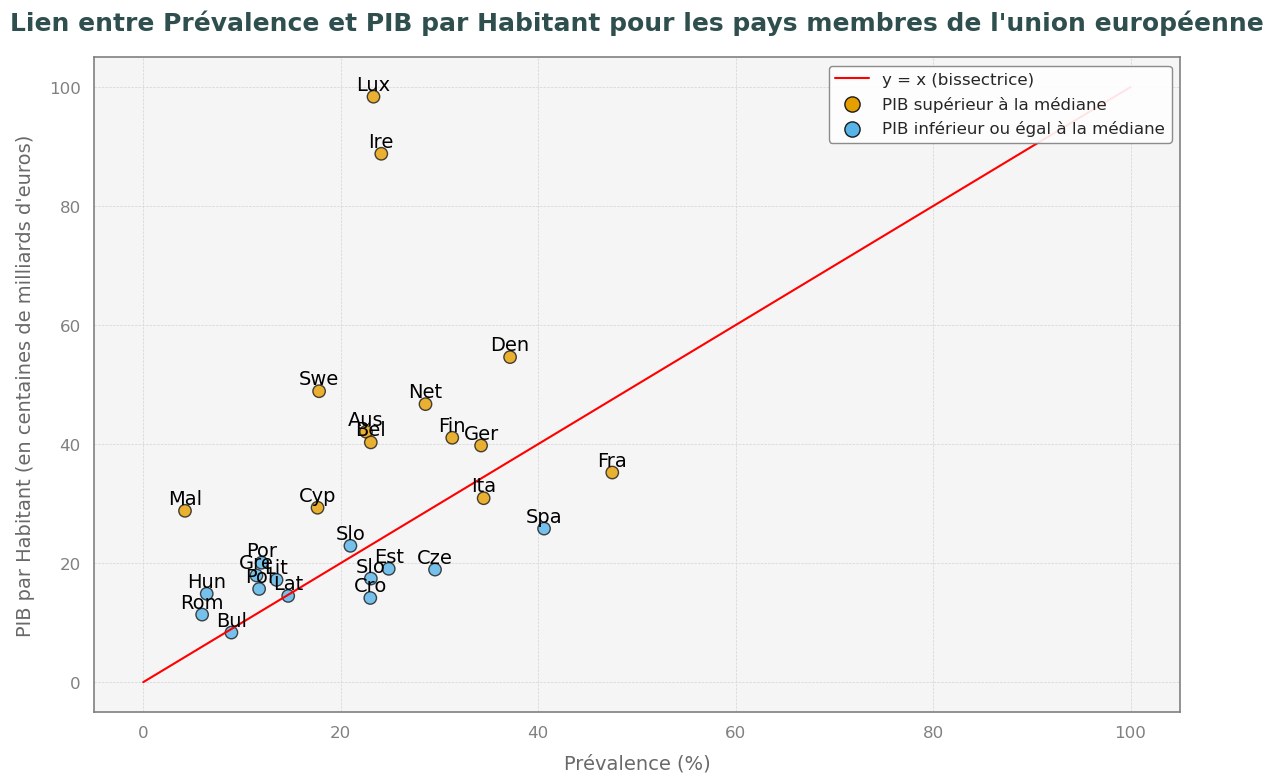

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On crée une nouvelle variable qui divise le PIB par habitant par mille afin de faire en sorte que les deux variables observées sont à la même échelle
Stats_des['PIB_r_hab_k'] = Stats_des['PIB_r_hab'] / 1000

### Afin de pouvoir distinguer les points des pays au dessus et en dessous de la médiane en matière de PIB par habitant, est nécessaire de créer une indicatrice dans notre table concernant la position par rapport à la médiane des pays
#On crée la colonne indicatrice
median_pib = Stats_des['PIB_r_hab_k'].median()
#On utilise cette colone pour déterminer la couleur des points sur le graphique
Stats_des['Color'] = Stats_des['PIB_r_hab_k'].apply(lambda x: '#E69F00' if x > median_pib else '#56B4E9')  # Orange et Bleu clair


### On utilise un style de graphique inspiré de travaux de Datascience disponible en ligne afin de rendre notre graphique plus lisible et agréable
#On paramètre en place du style général
plt.rcParams.update({
    'axes.facecolor': 'whitesmoke',
    'axes.edgecolor': 'gray',
    'axes.linewidth': 1.2,
    'grid.color': 'lightgray',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'font.size': 12,
    'legend.frameon': True,
    'legend.framealpha': 0.9,
    'legend.facecolor': 'white',
    'legend.edgecolor': 'gray'
})


#On régle la taille de la figure afin d'avoir une lisibilité suffisante (il faut que les points ne soient pas trop collés)
plt.figure(figsize=(12, 8))

#Après plusieurs essais, les points près de l'origine restant trop collés pour que ce soit lisible, on a décidé d'introduire un faible bruit permettant de régler ce problème sans induire un biais trop important (caratère aléatoire)
np.random.seed(42)
jitter_x = np.random.uniform(-0.5, 0.5, len(Stats_des))
jitter_y = np.random.uniform(-0.5, 0.5, len(Stats_des))



### On crée le scatter plot
plt.scatter(
    Stats_des['Prevalence (%)'] + jitter_x,  # On ajoute le bruit
    Stats_des['PIB_r_hab_k'] + jitter_y,    # On ajoute le bruit
    c=Stats_des['Color'], 
    alpha=0.8, 
    edgecolor='k', 
    s=80, # On met des points suffisamment petis pour que le graphique soit lisible
    label=None
)

#On ajoute la première bissectrice
x_values = np.linspace(0, 100) #Définition de la courbe
plt.plot(x_values, x_values, color='red', linestyle='-', linewidth=1.5, label='y = x (bissectrice)') #On ajoute la courbe au plot


###On ajoute les trois premières lettres des pays au-dessus des points
for i in range(len(Stats_des)):
    plt.text(
        Stats_des['Prevalence (%)'].iloc[i] + jitter_x[i], #coordonnées sur l'axe x des points
        Stats_des['PIB_r_hab_k'].iloc[i] + jitter_y[i] + 0.5,  #coordonnées sur l'axe y + On les mets au dessus des points
        Stats_des['Country'].iloc[i][:3], # Trois premières lettres
        fontsize=14,
        ha='center', 
        va='bottom',
        color='black', 
        fontweight='medium'
    )


### On ajoute un titre, des titres d'axes et une légende au graphique
plt.title("Lien entre Prévalence et PIB par Habitant pour les pays membres de l'union européenne", # titre
          fontsize=18, fontweight='bold', pad=20, color='darkslategray')
plt.xlabel('Prévalence (%)', fontsize=14, labelpad=10, color='dimgray') # titre axe x
plt.ylabel("PIB par Habitant (en centaines de milliards d'euros)", fontsize=14, labelpad=10, color='dimgray') # titre axe y

#On modifie le style des axes pour rendre le tout plus agréable
plt.xticks(fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')
plt.grid(True)

#On ajoute une légende
plt.scatter([], [], color='#E69F00', label='PIB supérieur à la médiane', s=120, edgecolor='k')
plt.scatter([], [], color='#56B4E9', label='PIB inférieur ou égal à la médiane', s=120, edgecolor='k')
plt.legend(fontsize=12, loc='upper right')

# On règle les paramètres d'affichage pour rendre le tout plus lisible
plt.tight_layout()
plt.show()



### Observations et analyse :

1) **Observations**

a) On note que, contrairement à ce qu'auguraient les données françaises à l'échelle individuelle sur le lien entre revenu des individus et consommation de cannabis (aucun lien clair n'était établi), ici, il apparaît que **le PIB par habitant est très largement et positivement corrélé à la prévalence en matière de cannabis**. 
*Remarque : il s'agit ici de prévalence, donc d'avoir consommé une fois dans sa vie du cannabis et non pas de consommation quotidienne, ce qui peut résulté en des différences quant au poids des phénomènes économiques et sociales sur la variation de cette variable d'intérêt*
**Ainsi, en règle général, plus les pays ont un PIB par habitant élevé, plus le taux de prévalence est élevé**.

b) Autre constat, il semble que les pays ayant **PIB par habitant au dessus de la médiane de l'échantillon** (ici l'union européenne) ** se situe la plupart du temps au dessus de la première bissectrice**. 
*Comment l'interpréter ?* Il semble que **l'effet marginal** de l'augmentation du PIB par habitant sur l'augmentation du taux de prévalence soit **décroissant** (*i.e* demeure positif mais est de moins en moins fort à mesure que celui-ci augmente).

c) Enfin, deux pays semblent être des ***outliers*** dans ce jeu de données concernant ces variables : l'Irlande et le Luxembourg : leurs points sont très éloigné du nuage de point formé par les autres pays du fait d'un **PIB par habitant très élevé** dans l'absolu mais aussi et surtout **relativement au taux de prévalence de ces deux pays**.

2) **Explications possibles et clés de lecture**

a) Comment expliquer cet effet à l'échelle des pays, contraire à celui à l'échelle des individus ?
Tout d'abord, dans les travaux de l'OFDT et de l'agence Santé Publique France, l'effet du revenu sur la prévalence n'est pas frontalement opposé aux résultats obtenus ici mais plutôt ambigu. Ainsi, il nous apparaît possible d'affirmer que cela ne contredit pas frontalement nos attentes (**surtout si l'analyse suivante qui portera sur l'IDH se montre encore plus probante que celle-ci, limitant ainsi l'effet du revenu**). De plus, il semble évident que les logiques économiques et sociales en jeu à l'échelle individuelle ne peuvent pas se transcrire de manière identique à l'échelle d'un pays. Toutefois, quant à expliquer les raisons de cette augmentation de la prévalence avec l'augmentation du PIB par habitant, on pourrait y voir une contradiction : si les pays sont plus "riches", la pauvreté devrait être un phénomène de moindre ampleur et partant des hypothèses formulées ci-dessus, la prévalence du cannabis devrait réduire ? Cette aporie peut tout d'abord être dépassée sur le fondement de travaux comme ceux de **Thomas Piketty** qui met en avant le fait que les **inégalités de richesses entre les individus sont importantes y compris dans des pays "riches"**.

b) Pourquoi certains pays au-dessus de la médiane en matière de PIB par habitant s'éloigne de la première bissectrice **vers le bas** (la France, l'Espagne, l'Italie) alors que d'autres **s'en écartent vers le haut** (le Danemark, La Suède, la Finlande).
On observe tout d'abord qu'il est globalement possible de différencier ces tendances en fonction du **schème de division Europe du Nord/Europe du Sud**. Ce constat nous incite à mobiliser ici les travaux de **G.Esping-Andersen, *Les Trois monde de l'Etat-providence* (2007)**. En effet, l'auteur y distingue trois modèles de **sécurité sociale** dont le modèle **social-démocrate d'Europe du Nord** et celui **conservateur-corporatiste d'Europe du Sud**.
Une des principales différences entre les deux étant qu'en Europe du Nord, les droits à cette protection sociale sont **universels** et **non-conditionnés à l'emploi et à des côtisations permettant ainsi de davantage protéger la population de la pauvreté et du manque d'intégration social induit**, fonctionnement différent de celui du modèle conservateur-corporatiste largement fondé sur **le critère de l'emploi**.
Or, dans le cas de la consommation de drogue, on a vu que le critère du chômage comme celui de la pauvreté jouait un rôle prépondérant à **l'échelle individuelle par le biais de phénomènes d'exclusion sociale**. Ainsi, à l'échelle des pays, on conjecturer que ces différences observer entre pays "riches" d'Europe du Nord et pays "riches" d'Europe du Sud peuvent résulter de ces **différences de modèles de protection sociale**.

c) Comment expliquer que l'Irlande et le Luxembourg dénote autant ? L'explication la plus évidente résulte dans le **modèle fiscal commun à ces deux pays et qui fait office d'exception en Europe** : ce sont des **"paradis fiscaux**. Comme le montre **Gabriel Zucman dans *La Richesse cachée des nations : enquête sur les paradis fiscaux* (2013)**, ce modèle fiscal permet à des petits pays de **gonfler largement leur PIB (et du fait de leur taille encore plus largement leur PIB par habitant)** en attirant de grandes multinationales souhaitant optimiser leur fiscalité. Ainsi, la donnée de la richesse nationale se retrouve davantage décorrélée d'autres variables à l'échelle nationale que dans d'autres pays, en l'occurrence sans doute est-ce le cas pour la prévalence en matière de cannabis.

#### Deuxième vérification : l'IDH 

**Définition de l'IDH**
L’Indice de Développement Humain (IDH) est une **mesure agrégée et pluridimensionnelle** qui évalue le niveau de développement d’un pays en prenant en compte trois dimensions fondamentales, au-delà donc de la seule dimension économique:

- **Santé et longévité** : mesurée par l'espérance de vie à la naissance.

- **Éducation** : mesurée par deux indicateurs :
La durée moyenne de scolarisation (pour les adultes de 25 ans et plus).
La durée attendue de scolarisation (pour les enfants entrant à l'école).

- **Niveau de vie décent** : mesuré par le revenu national brut (RNB) par habitant en parité de pouvoir d’achat (PPA).
L'IDH est exprimé sur une échelle allant de 0 à 1 :

0 indique un développement humain très faible.
1 correspond à un développement humain très élevé.

Ainsi, comme l'étude au niveau individuel des déterminants de la consommation de cannabis laissait présager une forte limite de la seule dimension économique, nous pouvons nous **attendre à un lien davantage étroit que pour le seul PIB par habitant**.


**Méthode de statistiques descriptives :**
Comme dans le cas précédent, nous allons utiliser un graphique sous forme de *scatter* (de points dispersés sur un plan en deux dimensions) afin d'étudier le lien entre IDH et prévalence à l'échelle nationale dans l'union européenne.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


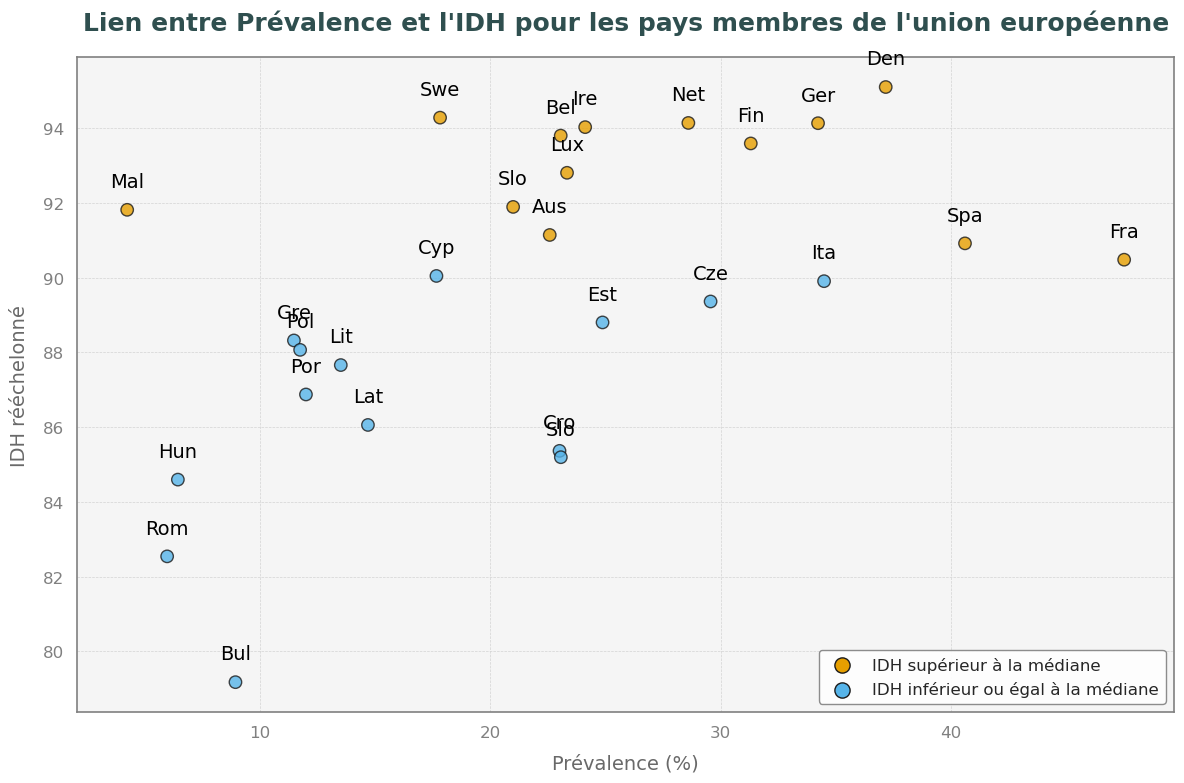

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On crée une nouvelle variable 'IDH_scaled' en transformant les IDH sur une échelle de 0 à 100
Stats_des['IDH_2'] = Stats_des['IDH']*100


### Afin de pouvoir distinguer les points des pays au dessus et en dessous de la médiane en matière d'IDH, est nécessaire de créer une indicatrice dans notre table concernant la position par rapport à la médiane des pays
#On crée la colonne indicatrice
median_IDH = Stats_des['IDH_2'].median()
#On utilise cette colone pour déterminer la couleur des points sur le graphique
Stats_des['Color'] = Stats_des['IDH_2'].apply(lambda x: '#E69F00' if x > median_IDH else '#56B4E9')  # Orange et Bleu clair


### On utilise un style de graphique inspiré de travaux de Datascience disponible en ligne afin de rendre notre graphique plus lisible et agréable
#On paramètre en place du style général
plt.rcParams.update({
    'axes.facecolor': 'whitesmoke',
    'axes.edgecolor': 'gray',
    'axes.linewidth': 1.2,
    'grid.color': 'lightgray',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'font.size': 12,
    'legend.frameon': True,
    'legend.framealpha': 0.9,
    'legend.facecolor': 'white',
    'legend.edgecolor': 'gray'
})


#On régle la taille de la figure afin d'avoir une lisibilité suffisante (il faut que les points ne soient pas trop collés)
plt.figure(figsize=(12, 8))

#Après plusieurs essais, les points près de l'origine restant trop collés pour que ce soit lisible, on a décidé d'introduire un faible bruit permettant de régler ce problème sans induire un biais trop important (caratère aléatoire)
np.random.seed(42)
jitter_x = np.random.uniform(-0.5, 0.5, len(Stats_des))
jitter_y = np.random.uniform(-0.5, 0.5, len(Stats_des))



### On crée le scatter plot
plt.scatter(
    Stats_des['Prevalence (%)'] + jitter_x,  # On ajoute le bruit
    Stats_des['IDH_2'] + jitter_y,    # On ajoute le bruit
    c=Stats_des['Color'], 
    alpha=0.8, 
    edgecolor='k', 
    s=80, # On met des points suffisamment petis pour que le graphique soit lisible
    label=None
)



###On ajoute les trois premières lettres des pays au-dessus des points
for i in range(len(Stats_des)):
    plt.text(
        Stats_des['Prevalence (%)'].iloc[i] + jitter_x[i], #coordonnées sur l'axe x des points
        Stats_des['IDH_2'].iloc[i] + jitter_y[i] + 0.5,  #coordonnées sur l'axe y + On les mets au dessus des points
        Stats_des['Country'].iloc[i][:3], # Trois premières lettres
        fontsize=14,
        ha='center', 
        va='bottom',
        color='black', 
        fontweight='medium'
    )


### On ajoute un titre, des titres d'axes et une légende au graphique
plt.title("Lien entre Prévalence et l'IDH pour les pays membres de l'union européenne", # titre
          fontsize=18, fontweight='bold', pad=20, color='darkslategray')
plt.xlabel('Prévalence (%)', fontsize=14, labelpad=10, color='dimgray') # titre axe x
plt.ylabel("IDH rééchelonné", fontsize=14, labelpad=10, color='dimgray') # titre axe y

#On modifie le style des axes pour rendre le tout plus agréable
plt.xticks(fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')
plt.grid(True)

#On ajoute une légende
plt.scatter([], [], color='#E69F00', label='IDH supérieur à la médiane', s=120, edgecolor='k')
plt.scatter([], [], color='#56B4E9', label='IDH inférieur ou égal à la médiane', s=120, edgecolor='k')
plt.legend(fontsize=12, loc='lower right')


# On règle les paramètres d'affichage pour rendre le tout plus lisible
plt.tight_layout()
plt.show()



### Observations et analyse :

1) **Observations**

a) **Une comparaison avec le graphique précédent difficile**
Du fait de la différence d'échelle (l'IDH est multiplié par 100 mais reste compris globalement entre 80 et 100 : l'ambitus des valeurs prises comparé à celui de la variable 'PIB_r_hab_k' est beaucoup plus faible) : il est donc complexe de les comparer concrètement, de mettre en perspective la force des liens entre ces deux variables et la prévalence.

b) Toutefois, il apparaît qu'un **lien notable apparaît entre augmentation de l'IDH et augmentation de la prévalence**. 
Or, un tel lien paraît surprenant au vu des hypothèses faites en préambules, notamment du fait que l'IDH contrairement au PIB par habitant prend en compte les **inégalités internes à chaque pays** ce qui pourrait induire une tendance diamétralement opposée : **une diminution de la prévalence avec la hausse de l'IDH**.
(*Remarque : la prise en compte de l'IDH de conditions de vie, au-delà du PIB par habitant a d'ailleurs induit le retour des points associés au Luxembourg et à l'Irlande au sein du nuage de points, preuve potentielle - même partielle - de la pertinence de l'usage de cet indicateur ici.)*

#### Dès lors, comment expliquer ce phénomène observé dans les données ?
**Plusieurs hypothèses**

2) **Des biais de collectes**


a) Certains pays comme la Bulgarie et la Roumanie affichent un taux de prévalence particulièrement bas, de même que leur IDH. On peut avancer l'hypothèse que joue un rôle un biais lié à une **collecte de données plus complexes**, peut-être liée à des institutions statistiques publiques moins développé que leurs homologues de pays à l'IDH plus élevé.

b) Pour certains pays, en particulier à la situation insulaire (dont Malte ou l'Irlande), la précision des données peut faire les frais d'un échantillon de trop petite taille (celle-ci n'est même pas mentionnée dans notre table *Stats_des*) ; on peut également mentionner la république Tchèque dont l'échantillon est **inférieur à 3000 personnes**, ce qui reste une **taille satisfaisante dans l'absolue bien que faible comparativement à d'autres pays étudiés ici**.

3) **Les limites de la transcription à l'échelle nationale des déterminants de la consommation de cannabis**

a) Les hypothèses élaborées en préambule de ce travail de statistiques descriptives et fondées sur des travaux scientifiques à l'échelle de la consommation de cannabis des individus était avant tout des **guides** nous permettant de savoir **dans quelle direction chercher** et non des conclusions péremptoires comme dit précédemment. Ainsi, il n'apparaît intellectuellement pas inacceptable de trouver des résultats **divergents voire contraires** à ceux avancés dans des travaux sur des sujets, certes connexes, mais toutefois différents : les logiques économiques et sociales à l'oeuvre **à l'échelle des individus** sont **indéniablement différentes de celles à l'oeuvre pour des groupes, d'autant plus lorsqu'ils sont aussi vastes et diverses que peuvent l'être les populations des pays de l'union européenne**.

b) De plus, il est nécessaire de rappeler que nous travaillons ici sur la **prévalence** là où les travaux cités, des rapports en passant aux ouvrages de sociologie, évoquent davantage la **consommation régulière de cannabis**. Il est donc encore une fois logique que les résultats divergent.

4) **Un début d'explication ?**

**Force est de constaté que le liens observé dans les données ci-dessus en matière de prévalence pour le cannabis dans les pays de l'union européenne sont les suivant : l'augmentation du PIB par habitant et de l'IDH sont liés à une augmentation de la prévalence.**

Il y a fort à parier que la difficulté à expliquer la prévalence en fonction des variables étudiées résulte de la présence de nombreuse variable omise. Notamment le fait que prendre la consommation de cannabis par le biais de la **déviance** (au sens sociologique du terme de comportement marquant un écart avec les normes sociales et/ou judiciaires en vigueur dans le groupe social de référence) nécessite d'étudier les normes en vigueur dans le groupe d'appartenance des individus, ici au moins le groupe national. Or les normes juridiques et morales varient entre les pays et cela est difficile à observer *via* des statistiques et sans une approche qualitative de la chose.
Des pistes de variables peu observées :

- l'accessibilité : certains pays, plus proches des pays de production ou entretenant des liens plus étroits, ou bien dont les réseaux de distribution sont ou légaux ou moins entravés par une répressions judiciaire effective, peuvent ainsi connaître une prévalence plus élevée et ce malgré des données économiques et sociales qui pourraient laisser présager l'inverse

- la prévalence n'étant pas la consommation régulière, celle-ci peut être fortement augmentait par une consommation unique ou exceptionnelle relevant par exemple de pratiques festives s'affranchissant au moins en partie de normes sociales en vigueur le reste du temps et agissant dans le cadre de la consommation régulière



## 1.2.2 Lien entre législation et prévalence

Comme évoquer ci-dessus, la consommation de cannabis comme pour de nombreuses autres drogues a tendance, au moins en Europe d'un **écart aux normes**, au moins morales, caractéristique d'un acte déviant à l'échelle des sociétés concernées (cela peut ne pas être le cas dans certains groupes sociaux plus restreints en terme de taille).
Toutefois, l'**écart à la norme juridique** n'est pas évident puisque certains pays de l'union européenne ont légalisé ou dépénalisé sa consommation.

Dès lors, observe-t-on un taux de prévalence plus élevé dans les pays où la consommation de cannabis ne constitue pas un écart à la norme juridique ? Si non, cela permet-il d'avancer encore plus sûrement que ce sont avant tout des **déterminants sociaux et économiques qui prévalent** dans le cas de la consommation de cannabis ?

***Modus operandi* pour les statistiques descriptives sur la question :**
Pour ce faire, nous allons produire un graphique *bar chart* où nous allons **classer dans l'ordre décroissant en fonction du taux de prévalence** les pays ainsi que changer la **couleur des *bars* en fonction de la juridiction en matière 
graphique bar sur le côté + couleur en fonction des législations en vigueur concernant la consommation de cannabis.

#### On commence par effectuer un *Merge*

Les tables concernées sont :
- *legal_pays_clean* pour la **législation des pays** en matière de consommation de cannabis
- *dfcurrentadultslf* pour les taux de prévalence en matière de cannabis dans la population des pays de l'union européenne

De plus, on enlève la Turquie pour laquelle nous n'avons pas d'information concernant la législation ici.

In [104]:
# Merge
Legal_et_conso = pd.merge(dfcurrentadultslf, legal_pays_clean, how="left", on="Country")

# Suppression Turquie
Legal_et_conso = Legal_et_conso[Legal_et_conso['Country'] != 'Turkey']

Legal_et_conso.head()


,Country,Country code,Survey year,Prevalence (%),Substance,Recall period,Age,Sample size,Males (%),Females (%),Recreational,Medical
0,Austria,AT,2020,22.7,Cannabis,Lifetime,All adults (15-64),4650.0,24.8,20.6,Decriminalized,Legal
1,Belgium,BE,2018,22.6,Cannabis,Lifetime,All adults (15-64),3954.0,28.1,17.3,Decriminalized,Legal
2,Bulgaria,BG,2020,8.7,Cannabis,Lifetime,All adults (15-64),3838.0,9.5,7.8,Illegal,Illegal
3,Croatia,HR,2019,22.9,Cannabis,Lifetime,All adults (15-64),4994.0,28.8,16.9,Decriminalized,Legal
4,Cyprus,CY,2022,18.0,Cannabis,Lifetime,All adults (15-64),3510.0,24.4,11.8,Illegal,Legal
5,Czechia,CZ,2020,29.9,Cannabis,Lifetime,All adults (15-64),2701.0,38.2,21.3,Decriminalized,Legal
6,Denmark,DK,2023,37.6,Cannabis,Lifetime,All adults (15-64),6550.0,45.7,29.9,Illegal,Legal
7,Estonia,EE,2018,24.5,Cannabis,Lifetime,All adults (15-64),2234.0,30.8,20.3,Decriminalized,Legal
8,Finland,FI,2022,31.2,Cannabis,Lifetime,All adults (15-64),3556.0,39.0,22.9,Illegal,Legal
9,France,FR,2021,47.3,Cannabis,Lifetime,All adults (15-64),18298.0,54.9,39.9,Illegal,Illegal


sur soins et infractions : comment la prise en charge modifie
:!\ oeuf ou la poule

Foucauld : surveiler et punir, est-ce que dans les deux cas crée pas de de l'exclusion, remet en question ce qu'on a vu, etc

#### On crée le graphique souhaité

Pour ce faire, on va là encore s'inspirer de graphiques présents dans des travaux de *Datascience* disponibles en ligne afin de produire un rendu le plus lisible et agréable à regarder possible.

Le but ici est de mettre en exergue d'éventuels liens entre **législation et prévalence** : en somme, est-ce qu'interdire la consommation de cannabis, faisant donc de celle-ci un acte déviant du point de vue juridique, influe-t-il sur ladite prévalence dans les pays de l'union européenne.

Par ailleurs on ne traite que le cas de la consommation dite **récréative**, le cas **médical** étant plus restreint en terme de nombre de consommateur (donc peu pris en compte dans la **prévalence**) et pour le coup très fortement lié à la juridiction, cette consommation résultant principalement de prescriptions médicales effectuées de manière encadrée par la loi en vigueur.

*Remarque : le cas de l'union européenne est particulièrement intéressant du fait d'une grande diversité de législations en matière consommation de cannabis et de drogues en général, puisque cohabitent dans un espace géographique et politique commun des pays qui l'ont légalisé (Portugal, Allemagne) et d'autres qui le pénalisent sévèrement comme la France*

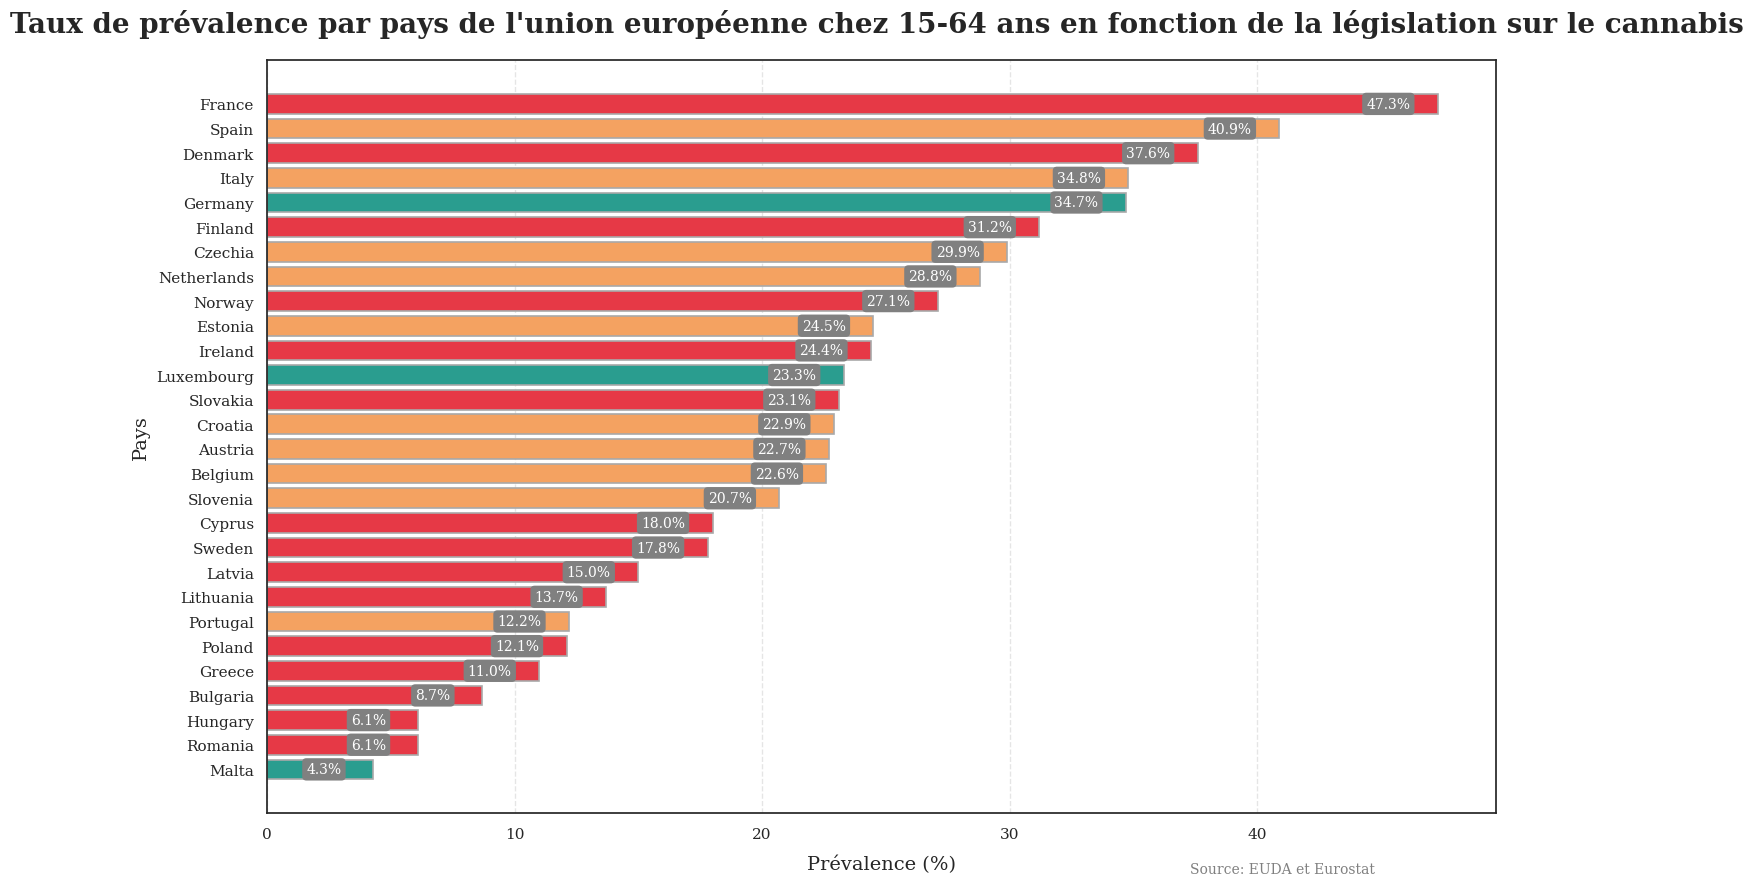

In [119]:
### Préparation liminaire sur la table
# On trie les pays par ordre décroissant de prévalence
Legal_et_conso_sorted = Legal_et_conso.sort_values(by='Prevalence (%)', ascending=False)

# On crée des variables à partir des colonnes de la table qui nous intéressent
countries = Legal_et_conso_sorted['Country']
prevalence = Legal_et_conso_sorted['Prevalence (%)']
recreational_status = Legal_et_conso_sorted['Recreational']

### On s'inspire de styles de graphiques afin de produire un rendu lisible
# Paramétrage des caractéristiques graphiques du style du plot
sns.set_theme(style="white", palette="muted", font="serif") 
plt.figure(figsize=(14, 9))  

# On choisit un gradient de couleurs lisibles et en accord avec les modalités des variables
# On crée une variable qui contient les couleurs utilisées
color_map = {'Illegal': '#E63946',   # Rouge vif pour l'illégal
             'Decriminalized': '#F4A261',  # Orange pâle pour le dépénalisé
             'Legal': '#2A9D8F'}  # Vert pour le légal
colors = recreational_status.map(color_map)

### Création du graphique en barres horizontales
#C'est à la fois le coeur de notre production graphique et l'étape la plus courte
bars = plt.barh(countries, prevalence, color=colors, edgecolor='darkgray', linewidth=1.2)

# On fait en sorte d'avoir le graphique orienté dans le sens souhaité
plt.gca().invert_yaxis()

# On ajoute des titres et une légende
plt.title("Taux de prévalence par pays de l'union européenne chez 15-64 ans en fonction de la législation sur le cannabis ", fontsize=20, weight='bold', pad=20)
plt.xlabel('Prévalence (%)', fontsize=14, labelpad=10)
plt.ylabel('Pays', fontsize=14)
plt.figtext(0.9, 0.02, 'Source: EUDA et Eurostat', ha='right', fontsize=10, color='gray')

# Affichage des valeurs sur les barres avec des bulles arrondies : choix stylistique inspiré d'autres travaux
for bar, value in zip(bars, prevalence):
    plt.text(bar.get_width() - 2,                
             bar.get_y() + bar.get_height() / 2, 
             f"{value:.1f}%",                  
             ha='center', va='center', 
             color='white', fontsize=10, 
             bbox=dict(facecolor='gray', edgecolor='none', boxstyle='round,pad=0.3'))  

# On personnalise les axes pour les rendres plus lisibles
plt.tick_params(axis='both', which='major', labelsize=11)  
plt.grid(axis='x', linestyle='--', alpha=0.5)             

# Idem pour les marges
plt.tight_layout()


# On affiche le rendu
plt.show()


### Observations et analyses : 

1) **Observations**

a) Il apparaît tout d'abord de manière évidente qu'il est **difficile de distinguer un *pattern* concernant le lien entre juridiction en matière de cannabis et prévalence**.

La France, exemple canonique en la matière, a la taux de prévalence le plus élevé (47.3%) alors même que c'est un des pays européen avec la juridiction la plus stricte en la matière dans les textes.

b) Toutefois, il apparaît qu'un grand nombre des pays occupants les dernières places du classement en matière de prévalence ont une juridiction dans laquelle **la consommation de cannabis est illégal**. Cela peut être le fait de plusieurs phénomènes que nous détaillons ci-dessous.


2) **Analyse**

a) Ainsi, l'hypothèse que la menace d'être juridiquement caractérisé de "déviant" ne permet pas d'endiguer la consommation de cannabis. Ainsi, demeure les observations suivantes :
- l'IDH et le PIB par habitants sont positivement lié à la prévalence dans la plupart des cas
- il existe un contrôle social dans certaines catégories de population qui tendent à limiter la consommation de cannabis pour les individus membre desdits groupes


b) Pour expliquer cette omniprésence de ces pays en bas du classement, on peut tout d'abord supposer que contrairement aux autre pays, **la consommation de cannabis est dans les fait plus durement condamnée qu'ailleurs**, d'un point de vue juridique avec une **application stricte** de l'interdiction ou bien socialement avec un contrôle social en la matière davantage accru. On peut extrapoler à partir des travaux de **Benoît Coquard** sur les "campagnes en déclin" et qui montre - dans le cas avant tout de la consommation d'héroïne, mais cela peut éventuellement se transcrire pour la consommation de cannabis dans ces pays, il s'agit d'une simple hypothèse qui nécessite vérification empirique - que cette consommation est associé à un lourd **stigmate**, au statut de **perdu** qui prive ainsi les concernés des bénéfices du **capital d'autochtonie**. Ainsi, dans ces sociétés davantage **rurales** d'Europe comme celles occupant en grande partie ces places dans le classement, cette crainte de l'exclusion sociale et de la condamnation juridique peut en partie expliquer ce phénomène (*remarque : il s'agit là encore d'une hypothèse qu'il serait intéressant de mettre à l'épreuve de travaux de sociologie qualitative sur le sujet*).
De plus, on peut garder encore une fois les mêmes risques d'erreurs de mesures dans ces pays où l'échantillon est plus restreint.

## 1.2.3 Statistiques descriptives sur le traitement par les autorités étatiques des consommateurs : soigner et/ou punir

Après avoir observé l'effet des variables macroéconomiques sur la consommation de cannabis à l'échelle des différents pays de l'union européenne, l'idée est ici d'observée comment **les états** répondent à cette consommation et comment cela est lié **à la prévalence**.

*Attention : encore une fois, on ne s'attend à aucune conclusion péremptoire, même de fortes corrélations pourraient être interprétés de manière tout à fait opposées : pas d'interprétation causale possible **a priori** ici*

**Notre principal axe d'interrogation sera portée sur la manière dont la mise en oeuvre de politiques fondées davantage sur la réinsertion des consommateurs de cannabis (une forme de réinsertion sociale commençant par le soin) ou bien basées sur la répréhension légale (une forme de contrôle social) s'imbrique avec le taux de prévalence et éventuellement essayer d'établir s'il s'agit là davantage de conséquences de la situation en matière de consommation ou de causes de celle-ci.**

#### Soigner : prises en charge médical lié au motif de consommation de cannabis

##### On commence par *Merge*...

Entre la table sur les admis en soins pour motif de consommation de cannabis (*table_soins_simple*) et celle sur la prévalence (*dfcurrentadultslf*)

##### ...puis on crée une nouvelle variable...
Qui va afficher le pourcentage d'**entrants** étant en situation de **précarité sur le marché de l'emploi** (comparé au total des entrants)

##### ...afin de faire un *bubble plot*
Ce graphique qui est une forme de *scatter* plus poussé permet d'inclure un troisième dimension représentée par **la taille et la couleur des points** et qui nous permets ici de voir comment les différents pays de l'union européenne traitent en matière de soins les individus les plus exposés à l'**exclusion sociale**.

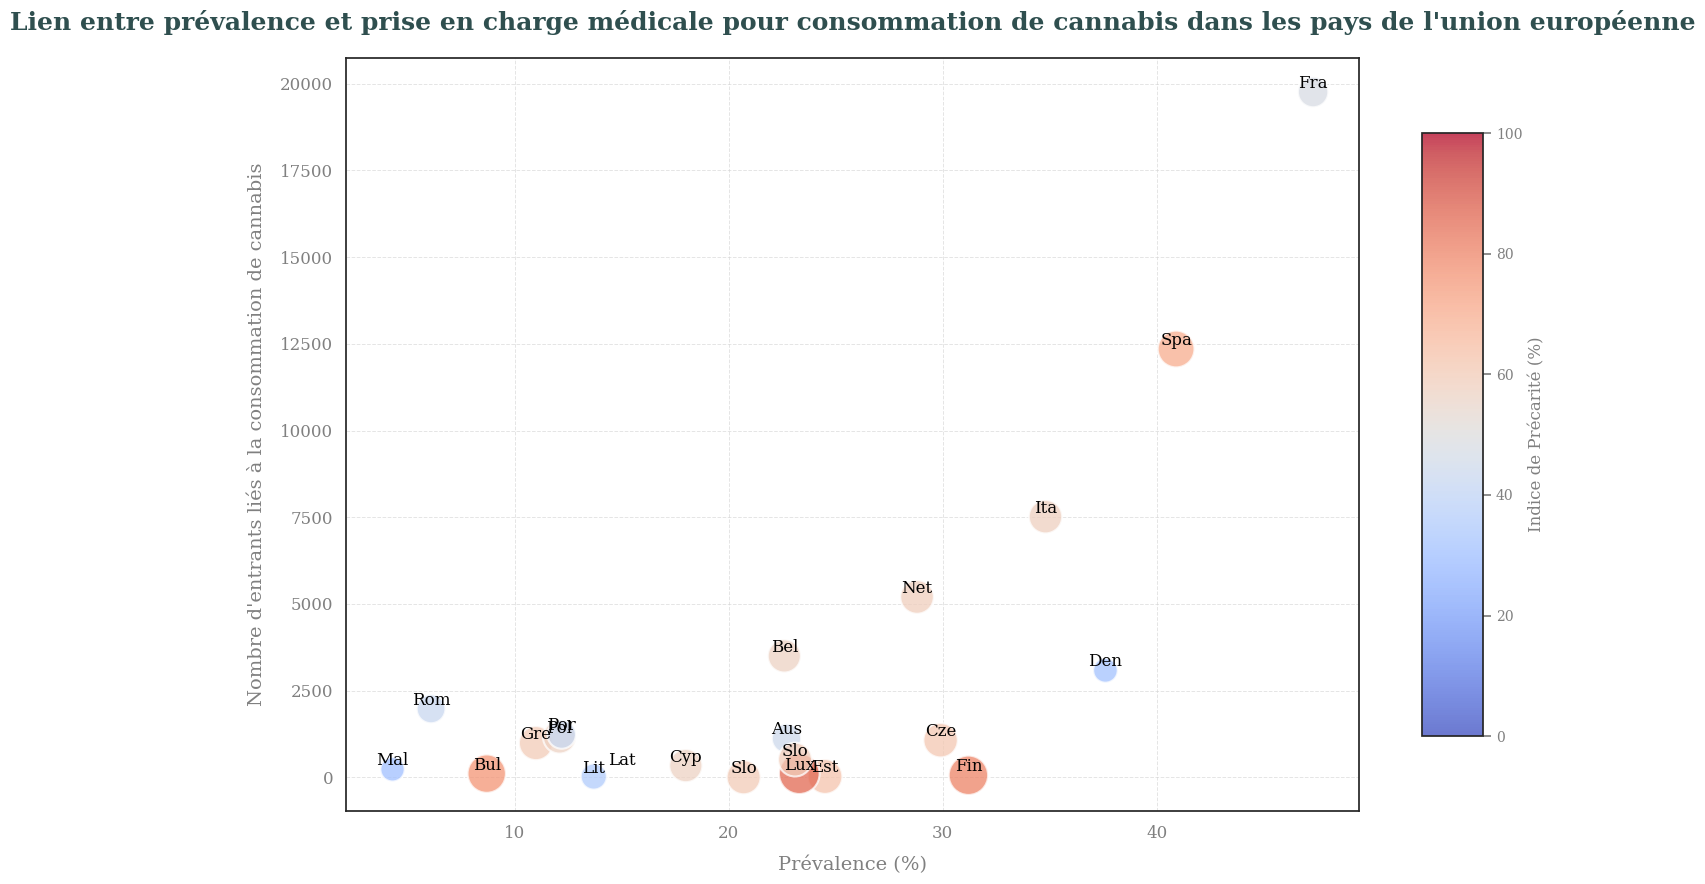

In [149]:
import matplotlib.pyplot as plt
import numpy as np

### On crée la nouvelle variable Precaire/Etudiant : part que représente cette population dans les admis en soins pour consommation de cannabis
table_soins_simple['Precaire/Etudiant'] = (
    (table_soins_simple['Student.global.pro'] + 
     table_soins_simple['Unemployed / discouraged.global.pro']) / 
    (table_soins_simple['Occasionally employed.global.pro'] + 
     table_soins_simple['Regularly employed.global.pro'] + 
     table_soins_simple['Student.global.pro'] + 
     table_soins_simple['Unemployed / discouraged.global.pro'])
) * 100

### Merge des tables
soins_conso = pd.merge(dfcurrentadultslf, table_soins_simple, how="left", on="Country")

### On enlève les lignes avec des valeurs manquantes après le merge
Colonnes_finales = ['Prevalence (%)', 'Cannabis (global)', 'Precaire/Etudiant']
soins_conso = soins_conso.dropna(subset=Colonnes_finales)


### Création du plot
#On crée les variables qui acceuillent nos données
x = soins_conso['Prevalence (%)']  # Abscisse
y = soins_conso['Cannabis (global)']  # Ordonnée
sizes = soins_conso['Precaire/Etudiant'] * 10  # Taille des points
countries = soins_conso['Country']  # Nom des pays pour annotation
colors = soins_conso['Precaire/Etudiant']  # Gradient de couleur




# On crée le cadre de la figure
plt.figure(figsize=(14, 9))

# Création du plot (scatter)
bubble_chart = plt.scatter(
    x, y, 
    s=sizes, 
    alpha=0.75,  
    c=colors, 
    cmap='coolwarm',  # On choisit les tons des couleurs
    edgecolor='white',  
    linewidth=1.5,
    vmin=0, 
    vmax=100  
)

# On ajoute le nom des pays au dessus des bulles
for i in range(len(soins_conso)):
    plt.text(
        x.iloc[i], y.iloc[i] + 0.5,  # Nom AU DESSUS de la bulle
        countries.iloc[i][:3], # Nom du pays
        fontsize=12, 
        ha='center', va='bottom', 
        color='black'  
    )

# On ajoute des titres aux axes
plt.title(
    "Lien entre prévalence et prise en charge médicale pour consommation de cannabis dans les pays de l'union européenne",
    fontsize=18, fontweight='bold', pad=20, color='darkslategray'
)
plt.xlabel('Prévalence (%)', fontsize=14, labelpad=10, color='gray')
plt.ylabel("Nombre d'entrants liés à la consommation de cannabis", fontsize=14, labelpad=10, color='gray')

# On crée un gradient à droite du graphique pour rendre visible les différences entre les pays de proportion de Precaire/Etudiant dans les admis
cbar = plt.colorbar(bubble_chart, shrink=0.8, aspect=10)
cbar.set_label('Indice de Précarité (%)', fontsize=12, color='gray')
cbar.ax.tick_params(labelsize=10, colors='gray')

# On ajoute une grille et on modifie les axes pour rendre le tout plus lisible
plt.grid(color='lightgray', linestyle='--', linewidth=0.7, alpha=0.6)
plt.xticks(fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')
plt.tight_layout()

# Affichage du graphique
plt.show()


**On refait la même graphique en retirant la France et l'Espagne dont les valeurs en matière de prise en charge des entrants est trop élevé pour permettre la lisibilité des autres bulles**

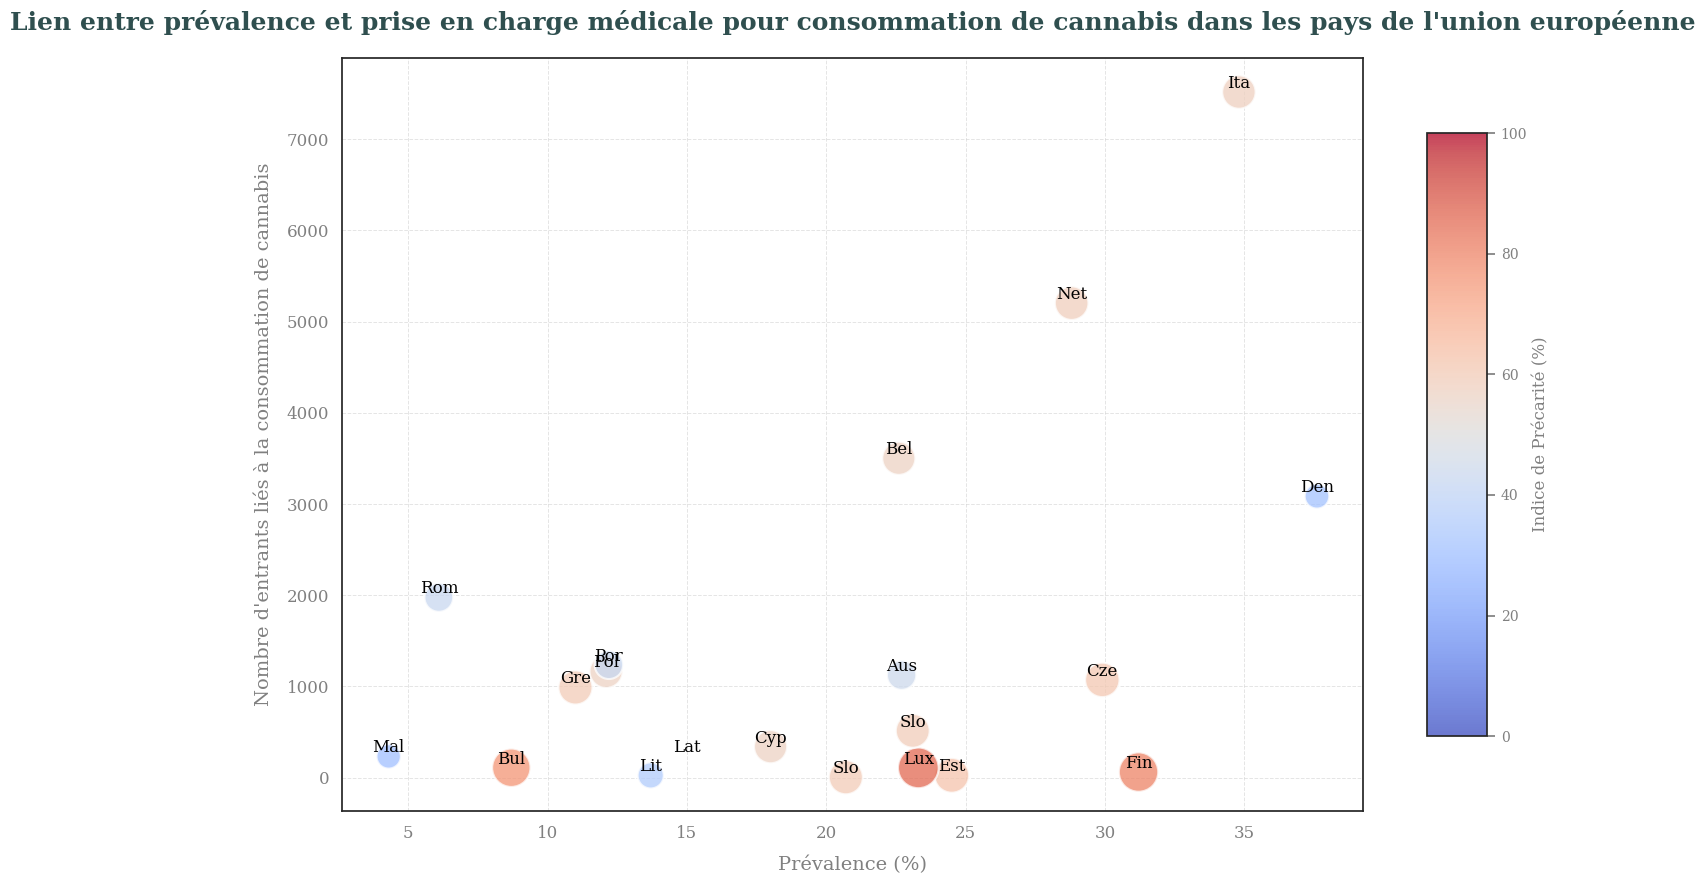

In [150]:
import matplotlib.pyplot as plt
import numpy as np

### On crée la nouvelle variable Precaire/Etudiant : part que représente cette population dans les admis en soins pour consommation de cannabis
table_soins_simple['Precaire/Etudiant'] = (
    (table_soins_simple['Student.global.pro'] + 
     table_soins_simple['Unemployed / discouraged.global.pro']) / 
    (table_soins_simple['Occasionally employed.global.pro'] + 
     table_soins_simple['Regularly employed.global.pro'] + 
     table_soins_simple['Student.global.pro'] + 
     table_soins_simple['Unemployed / discouraged.global.pro'])
) * 100

### Merge des tables
soins_conso = pd.merge(dfcurrentadultslf, table_soins_simple, how="left", on="Country")

### On enlève les lignes avec des valeurs manquantes après le merge
Colonnes_finales = ['Prevalence (%)', 'Cannabis (global)', 'Precaire/Etudiant']
soins_conso = soins_conso.dropna(subset=Colonnes_finales)


### On enlève la France et l'Espagne dans un but de lisibilité
soins_conso = soins_conso[~soins_conso['Country'].isin(['France', 'Spain'])]


### Création du plot
#On crée les variables qui acceuillent nos données
x = soins_conso['Prevalence (%)']  # Abscisse
y = soins_conso['Cannabis (global)']  # Ordonnée
sizes = soins_conso['Precaire/Etudiant'] * 10  # Taille des points
countries = soins_conso['Country']  # Nom des pays pour annotation
colors = soins_conso['Precaire/Etudiant']  # Gradient de couleur


# On crée le cadre de la figure
plt.figure(figsize=(14, 9))

# Création du plot (scatter)
bubble_chart = plt.scatter(
    x, y, 
    s=sizes, 
    alpha=0.75,  
    c=colors, 
    cmap='coolwarm',  # On choisit les tons des couleurs
    edgecolor='white',  
    linewidth=1.5,
    vmin=0, 
    vmax=100  
)

# On ajoute le nom des pays au dessus des bulles
for i in range(len(soins_conso)):
    plt.text(
        x.iloc[i], y.iloc[i] + 0.5,  # Nom AU DESSUS de la bulle
        countries.iloc[i][:3], # Nom du pays
        fontsize=12, 
        ha='center', va='bottom', 
        color='black'  
    )

# On ajoute des titres aux axes
plt.title(
    "Lien entre prévalence et prise en charge médicale pour consommation de cannabis dans les pays de l'union européenne",
    fontsize=18, fontweight='bold', pad=20, color='darkslategray'
)
plt.xlabel('Prévalence (%)', fontsize=14, labelpad=10, color='gray')
plt.ylabel("Nombre d'entrants liés à la consommation de cannabis", fontsize=14, labelpad=10, color='gray')

# On crée un gradient à droite du graphique pour rendre visible les différences entre les pays de proportion de Precaire/Etudiant dans les admis
cbar = plt.colorbar(bubble_chart, shrink=0.8, aspect=10)
cbar.set_label('Indice de Précarité (%)', fontsize=12, color='gray')
cbar.ax.tick_params(labelsize=10, colors='gray')

# On ajoute une grille et on modifie les axes pour rendre le tout plus lisible
plt.grid(color='lightgray', linestyle='--', linewidth=0.7, alpha=0.6)
plt.xticks(fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')
plt.tight_layout()

# Affichage du graphique
plt.show()

### Observations et analyses : 

1) **Observations**

a) La France et l'Espagne ressortent très largement en terme de nombre d'entrants liés au cannabis
*Attention : cela peut autant être lié a un **plus grand nombre de personnes nécessitant des soins pour ce motif** (cf la forte prévalence dans ces deux pays) comme cela peut émaner de **politiques volontaristes de prises en charge des individus nécessitant des soins pour ce motif***

b) Une grande partie des bulles a une couleur se situant dans le **rouge/orange** ce qui permet de noter qu'en grande partie, les personnes nécessitant des soins donc ayant une consommation conséquente sont des personnes **en situation de précarité professionnelle** ce qui corrobore les travaux sur les déterminants de la consommation à l'échelle individuelle et la thèse du lien avec **le manque d'intégration sociale**.
A l'échelle des pays, si on met de côté notamment le Luxembourg et la Bulgarie sur lesquels nous avons émis des doutes sur la qualité de l'échantillon, il semble que si tous les pays ayant une forte prévalence sont parmi ceux qui admettent en proportion le plus de personnes précaires, là où, à l'inverse, les pays ayant les plus faibles prévalences sont ceux qui, en proportion, admettent le moins de personnes en situation de précarité professionnelle (**mise à par le Danemark, les points bleus sont plutôt situés en bas à gauche de la figure**).

2) **Analyse**

**Il semble apparaître un lien observable entre précarité professionnelle à l'échelle de la population, prise en charge des personnes pour motif de consommation de cannabis et taux de prévalence**

*Remarque : à l'exception de certains pays en bas à droite (aucun en haut à gauche), qui pour la plupart sont des pays d'Europe centrale. Ces exceptions relèvent peut-être d'un manque de volonté politique (mise au ban des déviants) ou d'infrastructure de santé concernant la prise en charge médical des individus concernés*

Si là encore il est difficile de conclure en terme de **causalité**, d'autant plus tant qu'on a pas étudier la dimension répressive (par la voie du nombre d'infractions notées dans chaque pays pour consommation de cannabis), le lien mis en avant à l'échelle des individus entre **précarité professionnelle et consommation régulière de cannabis semble ici prendre corps à l'échelle des groupes de populations nationales** ; quant au à celui **entre prévalence et prise en charge médicale, il est difficile de s'avancer** sur laquelle influe le plus sur l'autre, s'il s'agit de mesure prises en réaction à des besoins ou de manière volontariste.

### 1.2.4 Punir : les infractions constatées de consommation de cannabis

##### On commence par *Merge*...

Entre la table sur les infractions à la loi pour motif de consommation de cannabis (*table_infractions_simple*), celle sur la prévalence (*dfcurrentadultslf*) ainsi que celle nous donnant le cadre légal de chaque pays en la matière (*legal_pays_clean*).

##### ...en ne gardant que la donnée la plus récente...
On s'intéresse uniquement à la variable '2022.0.cannabis.conso_x'.

##### ...afin de faire un scatter où la couleur des points dépend de la législation quant à l'usage récréatif du cannabis
Ce graphique qui est une forme de *scatter* permet d'inclure un troisième dimension représentée par **la couleur des points** et qui nous permets ici de voir comment les différents pays de l'union européenne contrôlent la consommation de cannabis en fonction du taux de prévalence et de la législation en vigueur.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


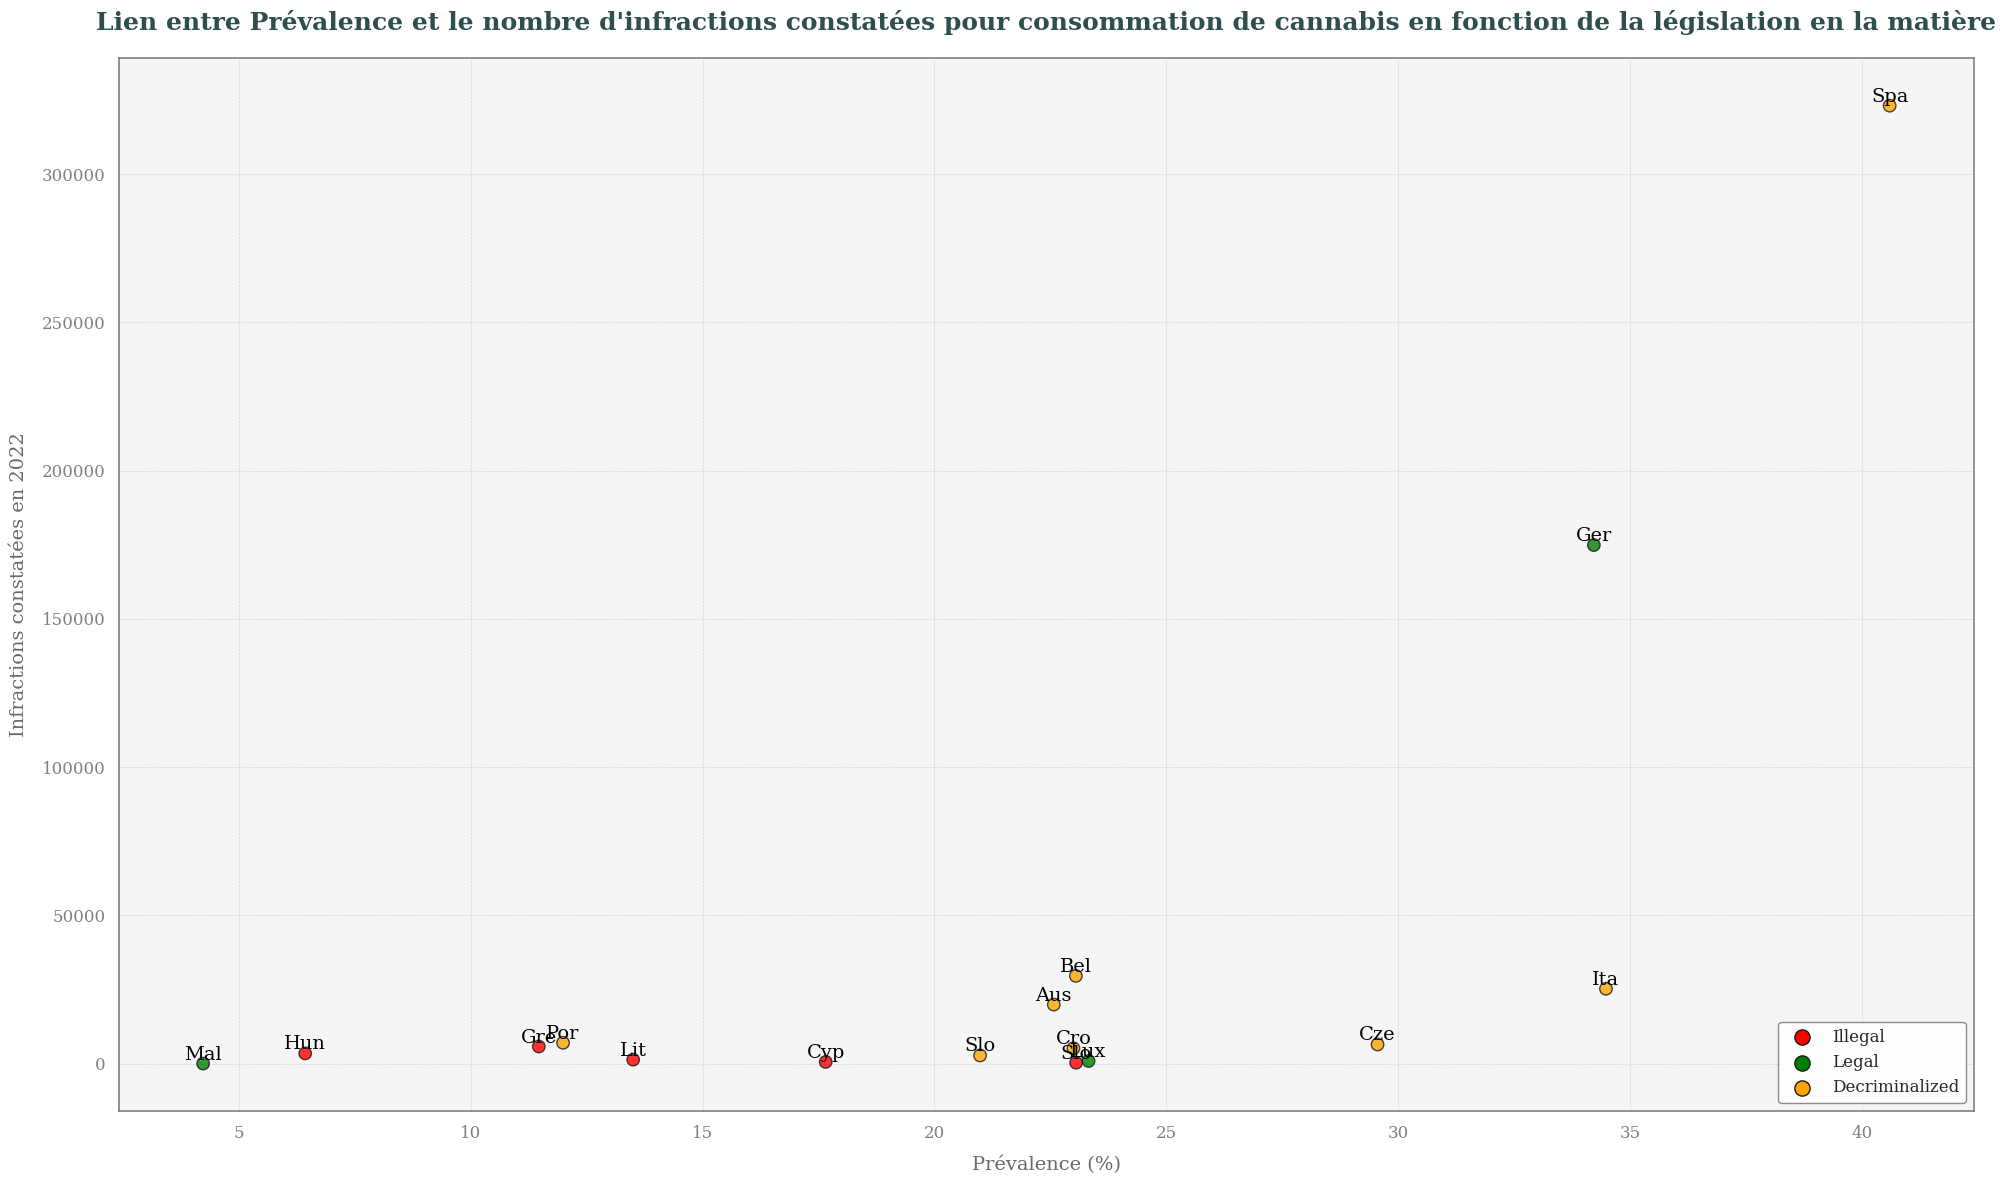

In [158]:
### On commence par faire le merge
intermediaire = pd.merge(dfcurrentadultslf, legal_pays_clean, how="left", on="Country")
infractions_conso = pd.merge(intermediaire, table_infractions_simple, how="left", on="Country")


###On utilise la colonne 'Recreational' pour déterminer la couleur des points sur le graphique
infractions_conso['Color'] = infractions_conso['Recreational'].apply(
    lambda x: 'red' if x == 'Illegal' else ('green' if x == 'Legal' else 'orange')
)

### On utilise un style de graphique inspiré de travaux de Datascience disponible en ligne afin de rendre notre graphique plus lisible et agréable
#On paramètre en place du style général
plt.rcParams.update({
    'axes.facecolor': 'whitesmoke',
    'axes.edgecolor': 'gray',
    'axes.linewidth': 1.2,
    'grid.color': 'lightgray',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'font.size': 12,
    'legend.frameon': True,
    'legend.framealpha': 0.9,
    'legend.facecolor': 'white',
    'legend.edgecolor': 'gray'
})


#On régle la taille de la figure afin d'avoir une lisibilité suffisante (il faut que les points ne soient pas trop collés)
plt.figure(figsize=(20, 12))

#Après plusieurs essais, les points près de l'origine restant trop collés pour que ce soit lisible, on a décidé d'introduire un faible bruit permettant de régler ce problème sans induire un biais trop important (caratère aléatoire)
np.random.seed(42)
jitter_x = np.random.uniform(-0.5, 0.5, len(Stats_des))
jitter_y = np.random.uniform(-0.5, 0.5, len(Stats_des))



### On crée le scatter plot
plt.scatter(
    infractions_conso['Prevalence (%)'] + jitter_x,  # On ajoute le bruit
    infractions_conso['2022.0.cannabis.conso_x'] + jitter_y,    # On ajoute le bruit
    c=infractions_conso['Color'], 
    alpha=0.8, 
    edgecolor='k', 
    s=80, # On met des points suffisamment petis pour que le graphique soit lisible
    label=None
)



###On ajoute les trois premières lettres des pays au-dessus des points
for i in range(len(Stats_des)):
    plt.text(
        infractions_conso['Prevalence (%)'].iloc[i] + jitter_x[i], #coordonnées sur l'axe x des points
        infractions_conso['2022.0.cannabis.conso_x'].iloc[i] + jitter_y[i] + 0.5,  #coordonnées sur l'axe y + On les mets au dessus des points
        infractions_conso['Country'].iloc[i][:3], # Trois premières lettres
        fontsize=14,
        ha='center', 
        va='bottom',
        color='black', 
        fontweight='medium'
    )


### On ajoute un titre, des titres d'axes et une légende au graphique
plt.title("Lien entre Prévalence et le nombre d'infractions constatées pour consommation de cannabis en fonction de la législation en la matière", # titre
          fontsize=18, fontweight='bold', pad=20, color='darkslategray')
plt.xlabel('Prévalence (%)', fontsize=14, labelpad=10, color='dimgray') # titre axe x
plt.ylabel("Infractions constatées en 2022", fontsize=14, labelpad=10, color='dimgray') # titre axe y

#On modifie le style des axes pour rendre le tout plus agréable
plt.xticks(fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')
plt.grid(True)

#On ajoute une légende
plt.scatter([], [], color='red', label='Illegal', s=120, edgecolor='k')
plt.scatter([], [], color='green', label='Legal', s=120, edgecolor='k')
plt.scatter([], [], color='orange', label='Decriminalized', s=120, edgecolor='k')
plt.legend(fontsize=12, loc='lower right')


# On règle les paramètres d'affichage pour rendre le tout plus lisible
plt.tight_layout()
plt.show()

**On note le fait qu'il y a beaucoup de valeurs manquantes pour les observations concernant les infractions constatées en 2022, dont la France**

*Remarque : l'absence de de nombreux pays où la consommation est **légale** fait sens étant donné que jusqu'à une certaine quantité, posséder et consommer du cannabis ne constitue donc plus une infraction à la loi. Par ailleurs, l'Allemagne a **légalisé la consommation récréative de cannabis au premier avril 2024**, d'où sa présence sur le graphique malgré le caractère désormais légal de la consommation de cannabis dans le pays.*

# Phase de modélisation: tentative de prédiction de la consommation et de la légalisation

Dans cette seconde phase du projet, nous allons nous appuyer sur les statistiques descriptives produites juste avant afin d'orienter nos choix de modélisation.

Nous allons ici présenter les deux approches que nous avons prises. En effet, nous avions d'abord en tête avec ce projet d'essayer de prédire la légalisation ou non du cannabis dans un pays donné à partir des données mises à disposition par l'EUDA. Cette première approche s'est avérée infructueuse après de nombreux essais; et nous expliquerons les raisons de cet échec et les conclusions que nous en avons tiré dans une partie "bonus", à la fin de ce notebook. En effet, même si le modèle obtenu n'était pas performant, il nous a tout de même permis de tirer des conclusions intéressantes sur notre jeu de données.

La principale raison pour laquelle ce premier modèle s'est avéré infructueux tenait notamment au manque de données disponibles, et au nombre restreint d'observations à notre disposition. Nous avons alors mis en place plusieurs solutions à ce problème:

- En premier lieu, nous avons changé la variable à prédire. Plutôt que de se concentrer sur la législation, trop peu corrélée aux données disponibles, nous nous attacherons plutôt à tenter d'estimer la part de la consommation de cannabis dans chaque pays, en utilisant des variables socioéconomiques. Cela exige alors de changer de modèle, en abandonnant le classifieur initialement prévu à différents modèles de régression.

- Ensuite, nous avons tenu à rassembler des données plus conséquentes sur chaque pays, afin d'entraîner plus finement chaque modèle. On a ainsi pu récupérer en complément des données sur la consommation de drogues, d'autres données sur les admissions à l'hôpital liées à la consommation de drogues, sur le nombre d'infractions commises liées au trafic, ou encore des données macroéconomiques simples sur chaque pays (PIB, IDH, tau de criminalité...). On espère ainsi pouvoir entraîner un modèle plus performant

## 1. Phase de préparation des données

Comme à chaque fois que l'on souhaite entraîner un modèle, **il convient avant tout de préparer et nettoyer les données au préalable.** Nous effectuerons cette tâche selon le schéma suivant:

1. Tout d'abord la collecte et la restriction, dans la masse de données mises à notre disposition, des seules variables qui nous intéressent réellement afin d'effectuer notre entraînement, en ignorant les variables moins intéressantes afin d'obtenir un *dataframe* clair et lisible, ne contenant aucun **NaN** ou valeur nulle.

2. Ensuite la préparation de ces données, notamment la standardisation et la normalisation de celles-ci afin de pouvoir effectuer notre régression correctement.

### 1.1 Nettoyage et restriction des données

#### 1.1.1 Une fonction d'agrégation bien utile

Le premier problème à régler est le suivant: dans notre jeu de données nous disposons de beaucoup de variables identiques, relevées année par année. Or il se peut dans beaucoup de cas que l'on dispose de données récentes pour certains pays, mais pas pour d'autres pour lesquels il faut remonter quelques années en arrière. Cela a pour conséquence un jeu de donnée très troué, avec beaucoup de **NaN** dont on aimerait se débarrasser.

Afin de limiter au maximum le nombre de données vides, **on se décide alors à ne garder pour chaque pays que les données les plus récentes disponibles**. Cela nous permet de minimiser le nombre de valeurs manquantes puisqu'au lieu de ne considérer que l'année ou il y a le moins de trous, on écrase toute les années en ne gardant que la donnée la plus récente (ce qui soit dit en passant a tout de même un sens; utiliser le chiffre le plus récent semble plus raisonnable que de choisir arbitrairement l'année pour laquelle on a le plus de données)

Cela est implémenté par une simple fonction, qui fonctionne sur notre structure de donnée définie au préalable (pour plus d'informations, se référer à la deuxième partie du Notebook `Tidy.ipynb`)

In [103]:
def get_latest_data(df, new_df, variable):
    """ Parcours la table pour créer une nouvelle variable qui prend en compte les données les plus récentes disponibles
        Ce afin de pallier aux fait qu'on manque de données récentes pour certaines variables"""

    columns = list(df.columns.values)
    good_col = []

    new_df['Country'] = df['Country']

    for i in range(len(columns)):
        if variable in columns[i]:
            good_col.append(columns[i])

    for index in df.index:
        for column in good_col:
            if pd.isna(df.at[index, column]) == False:
                new_df.at[index, variable] = df.at[index, column]
                break

    new_df.dropna(inplace = True)

    return new_df

#### 1.1.2 Choix des données pour la régression linéaire

Après l'échec de la mise en place de notre classifieur (voir la partie bonus), nous avons conclu que la principale difficulté à surmonter était le **manque d'individus disponibles dans notre base de données**. Cette difficulté est particulièrement problématique car elle tient à la nature même de notre étude, restreinte aux pays de l'Union Européenne.

On décide donc finalement de se tourner vers un modèle de régression linéaire, et ce pour plusieurs raisons:

- En premier lieu, car il semble raisonnable de pouvoir prédire une variable comme la consommation de cannabis à partir de caractéristiques socio-économiques de chaque pays, en faisant l'hypothèse que les pays aux caractéristiques similaires ont un niveau de consommation tout aussi similaire, comme nous avons pu en avoir l'intuition dans notre partie de statistiques descriptives

- En second lieu car dans l'éventualité ou notre modèle viendrait à ne pas prédire correctement, il nous resterait toute la partie descriptive et l'analyse des différents coefficients de la régression à se mettre sous la dent.

On prendra donc comme variable Y la prévalence en pourcentage, sur la vie entière et lors du mois dernier, afin de réaliser deux régression différentes et de les comparer.
Pour les variables X, on choisira principalement les variables socio-économiques mises à disposition par Eurostat, à savoir **le PIB, l'IDH, les dépenses de la sécurité sociale et le pourcentage de délinquance dans les grandes villes**.
On pourra ensuite choisir d'y ajouter d'autres données un peu plus fines de l'EUDA, comme le nombre d'admis aux urgences pour consommation de cannabis, afin d'affiner notre modèle si besoin.

On s'affaire donc dans le bloc suivant à récupérer ces données et à les agréger dans une seule table.

In [104]:
import pandas as pd

#On récupère la prévalence
df = pd.read_csv('https://raw.githubusercontent.com/refouch/Projet_Python_2A/refs/heads/main/Data/EUDA/edr2024-gps-current-table-1.csv')

dfcurrent = df[df['Substance'] == 'Cannabis']

dfcurrentadults = dfcurrent[dfcurrent['Age'] == 'All adults (15-64)']

dfcurrentadultslf = dfcurrentadults[dfcurrentadults['Recall period'] == 'Lifetime']

dfcurrentadultslf = dfcurrentadultslf[['Country','Prevalence (%)']]

#On récupère les données socio-économiques depuis Tidy.ipynb

socio_eco = table_macro

#on effectue enfin le merge
table_regression = pd.merge(dfcurrentadultslf,socio_eco)

table_regression.set_index('Country',inplace=True)

table_regression.head()

,Prevalence (%),PIB_r_hab,IDH,depenses_soc,delinquance_ville%
Country,,,,,
Austria,22.7,42540,0.916,136092.99,10.9
Belgium,22.6,40180,0.937,160905.04,29.6
Bulgaria,8.7,8660,0.795,16049.73,33.1
Croatia,22.9,14580,0.858,14133.97,2.2
Cyprus,18.0,28860,0.896,5827.16,6.1


### 1.2 Analyse exploratoire des données.

On effectue une première analyse sur les données que l'on souhaite fournir à notre modèle, afin d'en évaluer la pertinence et de pouvoir éventuellement corriger leur distribution par la suite, avec des normalisations et des standardisations.

On commence par étudier la distribution de la variable cible.

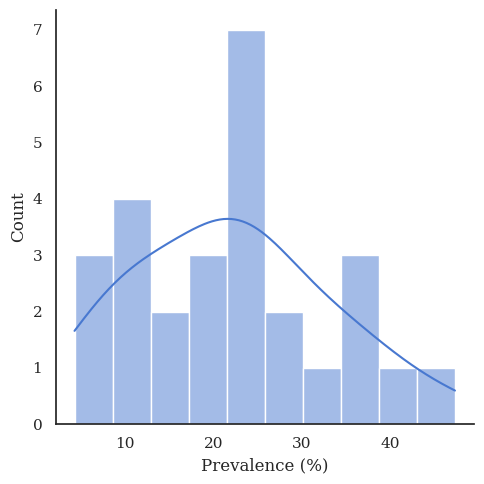

In [105]:
import seaborn as sns

sns.displot(data=table_regression,x='Prevalence (%)',bins = 10, kde=True)

On retrouve donc une distribution normale plutôt classique, quoiqu'un petit peu écrasée sur la gauche. On ne constate pas vraiment non plus la présence d'outliers dans notre variable à prédire, ce qui est plutôt bon signe.

On trace ensuite la matrice de corrélation entre nos différentes variables, afin de pouvoir mieux sélectionner celles qui nous seront utiles ou non.

<Axes: >

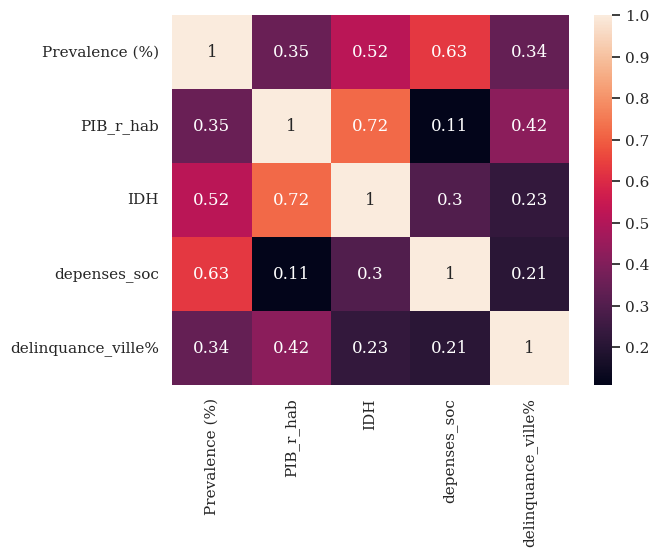

In [106]:
correlation_matrix = table_regression.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

On observe, entre autres:

- Que notre variable cible n'est jamais très fortement corrélée à l'une ou l'autre des variables, mais qu'elle est le plus corrélée avec l'IDH et avec les dépenses de la sécurité sociale. Ce seront donc deux pistes à privilégier.
Il nous faudra cependant bien étudier à part chaque variable. On sait de par notre analyse descriptive que l'IDH présente une variance très faible, ce qui la rend en soi peut utile pour distinguer les pays entre eux.

- On remarque en outre que le PIB et l'IDH sont fortement corrélés. c'est une chose à prendre en compte dans notre régression puisque cette corrélation pourra être vecteur de biais. On se rappelle donc de ne pas utiliser ensemble pour l'entraînement de notre modèle.

On choisit donc de se concentrer sur l'IDH et les dépenses de la sécurité sociale, on essaie avant tout d'observer leur distribution et de chercher d'éventuels outliers à retirer.

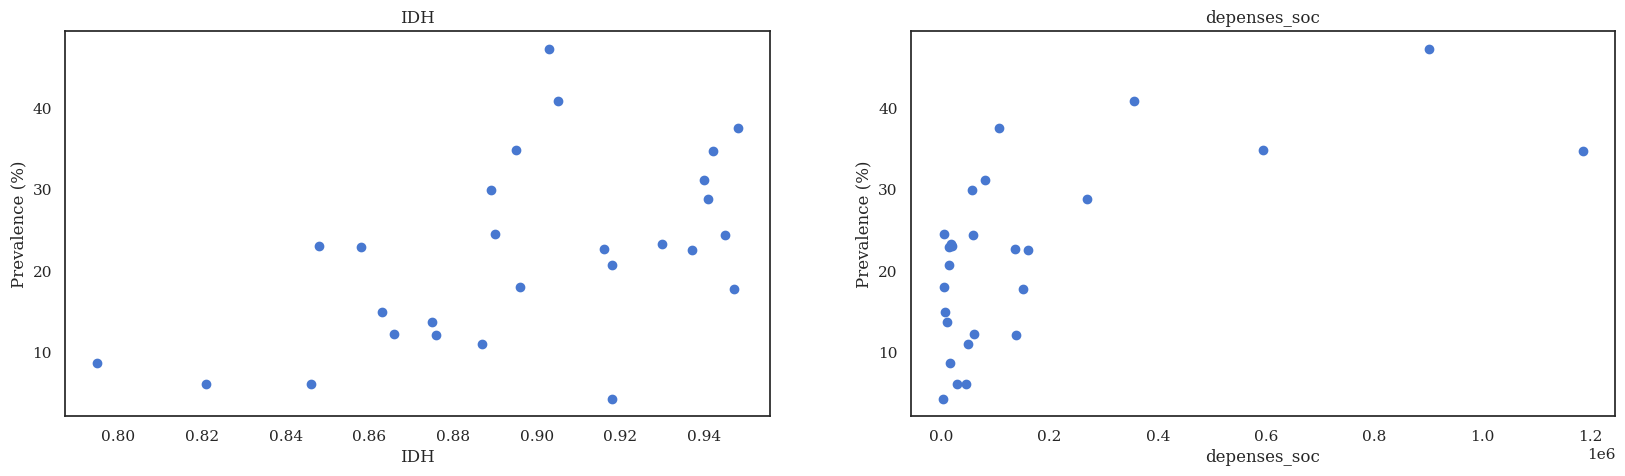

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
features = ['IDH', 'depenses_soc']
target = table_regression['Prevalence (%)']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = table_regression[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prevalence (%)')

Dans le cas de l'IDH on retrouve notre légère corrélation entre nos deux variables, bien qu'elle doit plutôt éparse.

Pour les dépenses de la sécurité sociale, on a bien une corrélation mais on semble retrouver quelques outliers dont les dépenses sont bien supérieures à celles des autres pays. On va alors tenter de les éliminer afin de ne pas induire notre modèle en erreur.

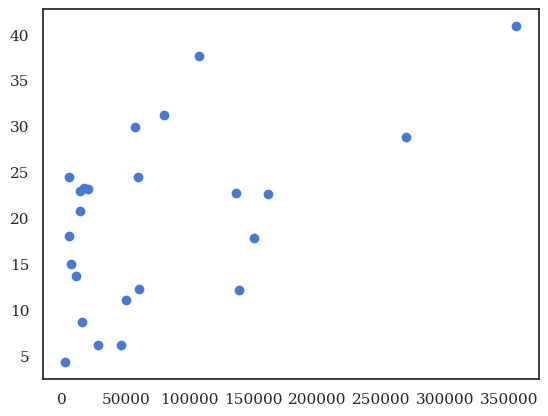

In [108]:
table_regression_fixed = table_regression.drop(index=['France','Germany','Italy'])

x = table_regression_fixed['depenses_soc']
y = table_regression_fixed['Prevalence (%)']
plt.scatter(x, y, marker='o')

Même si on perd ainsi la France, l'Italie et l'Allemagne, on se retrouve avec un distribution bien plus compacte, sans valeur extrême, qui nous semble plus adaptée afin de faire tourner notre modèle.

On regarde enfin la distribution de chacune de nos deux variables afin de déterminer les éventuels ajustements à appliquer.

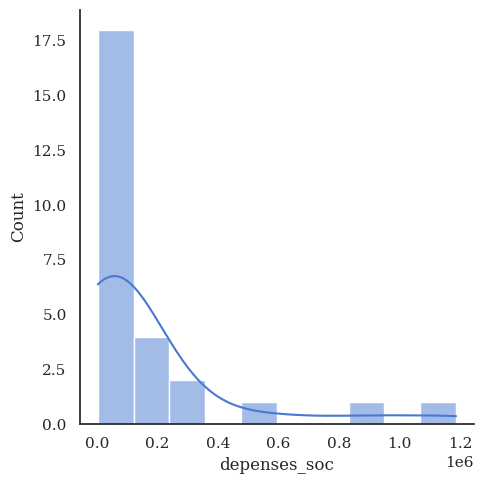

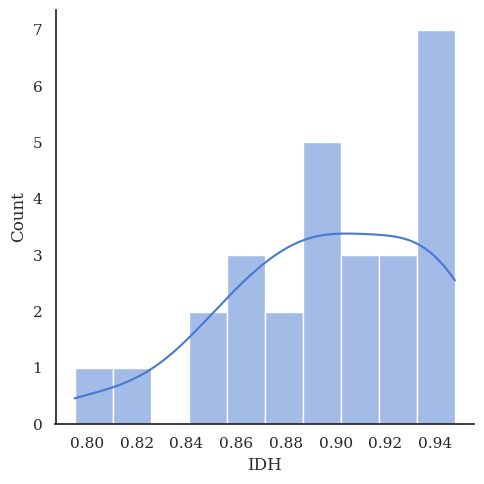

In [109]:
sns.displot(data=table_regression,x='depenses_soc',bins = 10, kde=True)
sns.displot(data=table_regression,x='IDH',bins = 10, kde=True)

On note alors plusieurs choses à régler sur nos deux variables:

- Les dépenses de la sécurité sociale ont une distribution fortement concentrée sur la gauche. On essaiera donc d'appliquer une standardisation des données pour obtenir une distribution plus conforme à la variable que l'on essaie de prédire.

- L'IDH lui est (comme prévu) très aplati, avec beaucoup de valeurs similaires (entre 0.8 et 0.95). Idem, il semble pertinent de standardiser les données pour obtenir une variance de 1.

Enfin, puisque nos deux variables sont de nature très différentes (l'une entre 0 er 1, l'autre avec un ordre de grandeur immense), il faudra les normaliser toutes les deux afin de ne pas biaiser lourdement la régression dans un sens.
**C'est ce que l'on met en place immédiatement dans la partie suivante**

## 2. Mise en place de la régression linéaire

### 2.1 Entraînement du modèle

On commence par une préparation classique de nos données. Tout d'abord on les découpes en échantillon d'entraînement et de test, en gardant ~20% de la masse totale de données pour tester notre modèle. 

On applique ensuite nos deux processus de standardisation et de normalisation à l'aide des outils de preprocessing intégrés à Scikit.

In [110]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Y = table_regression['Prevalence (%)']
X = table_regression[['IDH', 'depenses_soc']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state = 243)

X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

scaler = preprocessing.StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Une fois nos données préparées, on peut entraîner notre modèle de régression linéaire afin de tenter de prédire la prévalence pour chaque pays.

In [111]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lm = linear_model.LinearRegression()

lm.fit(X_train,Y_train)

Y_pred = lm.predict(X_test)

print("La performance du modèle pour l'échantillon de test: \n----------")
print('Le score R² du modèle est:', r2_score(Y_test,Y_pred))
print("L'erreur quadratique moyenne est égale à", np.sqrt(mean_squared_error(Y_test, Y_pred)))

La performance du modèle pour l'échantillon de test: 
----------
Le score R² du modèle est: 0.014393602990983245
L'erreur quadratique moyenne est égale à 6.596719841283688


### 2.2 Conclusions

Comme on pouvait s'y attendre, les prédictions de notre modèle sont vraiment mauvaises, et lors de notre phase de test on a même pu obtenir des scores R² négatifs, signifiant que selon le découpage, notre modèle pouvait être amené à prédire notre variable cible moins bien qu'une droite de régression horizontale...

Il faut se rendre à l'évidence: notre jeu de données n'est tout simplement pas adapté à l'entraînement de modèles de machine learning à des fins de prédiction. Il ne nous est pas non plus possible de régler ce problème sans complètement rayer tout le travail effectué. En somme, il nous faudrait changer complètement de sujet.

Nous avons tout de même essayé de tirer le maximum du jeu de données à notre disposition. **En effet, si les résultats obtenus ne sont pas à la hauteur de nos espérances, nous avons tout de même pu tirer de nombreuses leçons de la réalisation de ce projet**

Nous avons donc essayé au maximum de mettre en avant dans ce Notebook la démarche entreprise, les difficultés que nous avons rencontré et les solutions envisagées. C'est donc finalement pour nous le véritable produit de notre travail, car le fait de travailler avec un *dataset* compliqué contenant beaucoup de valeurs manquantes nous a montré toute l'importance de la phase de sélection et de nettoyage de nos données, et nous a permis de nous entraîner à prendre des décisions méthodologiques parfois difficiles.
Le fruit de notre travail, nous le trouvons donc bien plus dans le chemin parcouru et l'expérience apprise que dans les résultats obtenus.

## 3. BONUS: Une première idée rejetée (classifieur)

Nous avons en premier lieu essayé de prédire la légalisation ou non du cannabis au sein d'un même pays à l'aide d'un SVM prenant en entrée la prévalence dans chaque pays.

Cette première approche n'a pas porté les fruits escomptés et ce pour plusieurs raisons, la principale étant une inadéquation entre notre jeu de données (trop faible) et le modèle choisi. Cette dernière section nous permet d'illustrer les raisons de cet échec et de tirer des conclusions sur la démarche à adopter lors du choix et de la mise en place de modèles.

### 3.1 Premier entraînement du classifieur sur des données de prévalence

On s'était d'abord restreint dans le cadre de la prédiction de la légalisation ou non du cannabis dans chaque pays, au pourcentage d'individus ayant déjà consommé du cannabis dans leur vie pour chaque pays.
On se rend alors vite compte que cette restriction nous donne un jeu de données très faible (1 observation par pays, soit seulement 29 observations). Ce qui va poser problème par la suite.

In [112]:
import pandas as pd

# On récupère la table de légalisation que l'on a nettoyé en amont

legal = legal_pays_clean

# On prend la prévalence sur la vie entière

df = pd.read_csv('https://raw.githubusercontent.com/refouch/Projet_Python_2A/refs/heads/main/Data/EUDA/edr2024-gps-current-table-1.csv')

dfcurrent = df[df['Substance'] == 'Cannabis']

dfcurrentadults = dfcurrent[dfcurrent['Age'] == 'All adults (15-64)']

dfcurrentadultslf = dfcurrentadults[dfcurrentadults['Recall period'] == 'Lifetime']

# On effectue un merge les deux tables
dfadultslf_legal = pd.merge(dfcurrentadultslf,legal,on='Country')

dfadultslf_legal.head()

,Country,Country code,Survey year,Prevalence (%),Substance,Recall period,Age,Sample size,Males (%),Females (%),Recreational,Medical
0,Austria,AT,2020,22.7,Cannabis,Lifetime,All adults (15-64),4650.0,24.8,20.6,Decriminalized,Legal
1,Belgium,BE,2018,22.6,Cannabis,Lifetime,All adults (15-64),3954.0,28.1,17.3,Decriminalized,Legal
2,Bulgaria,BG,2020,8.7,Cannabis,Lifetime,All adults (15-64),3838.0,9.5,7.8,Illegal,Illegal
3,Croatia,HR,2019,22.9,Cannabis,Lifetime,All adults (15-64),4994.0,28.8,16.9,Decriminalized,Legal
4,Cyprus,CY,2022,18.0,Cannabis,Lifetime,All adults (15-64),3510.0,24.4,11.8,Illegal,Legal


On a ensuite mis en place notre classifieur de manière classique, en utilisant les fonctions déjà fournies par ScikitLearn. Quelques remarques cependant sur la construction de notre modèle:

- On choisit de recoder les variables catégorielles sur la légalité en une variable binaire: 0 si le cannabis est Illegal, 1 si il est Légalisé ou Décriminalisé. Après plusieurs test en effet, nous avons conclu qu'il était préférable de se limiter à une variable binaire et de ne pas marquer la spécificité de la décriminalisation, notre jeu de données étant déjà suffisamment restreint.

- On choisit de diviser nos données de manière assez classique, en gardant un échantillon de 20% pour tester notre modèle tout en gardant 80% pour l'entraînant. Cela pose déjà un problème puisque cela ne laisse en soi que 6 observations sur lesquelles tester notre modèle, et 22 sur lesquelles l'entraîner. Ce qui amènera par la suite de fortes disparités d'une phase d'entraînement à l'autre.

- Pour notre premier essai, nous tentons simplement de fournir à notre modèle la prévalence sur la vie entière (i.e le pourcentage d'individus par pays ayant déjà fumé du cannabis dans sa vie), ainsi que la prévalence en fonction du sexe. Cela s'avèrera évidemment insuffisant, mais cela nous permettra par la suite d'illustrer au mieux les problèmes rencontrés et d'appuyer les conclusions que nous en avons tiré. Ces données on en outre le bon goût d'être de simples pourcentages, ce qui ne permet de ne pas avoir à les normaliser au préalable, ni d'avoir a se soucier d'éventuels outliers.


Ceci étant dit, nous pouvons passer à la phase d'entraînement du modèle. **Nous allons ainsi l'entraîner deux fois en prenant à chaque fois une *seed* différente** ce qui va nous permettre de démontrer l'inconstance de notre modèle, et finalement sa faible utilité.

In [113]:
from sklearn import svm
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings('ignore')

# Recodage des variables catégorielles et division de notre échantillon

dfadultslf_legal['Recreational_num'] = dfadultslf_legal['Recreational'].replace({'Decriminalized' : 2, 'Legal' : 1, 'Illegal' : 0})
dfadultslf_legal['Medical_num'] = dfadultslf_legal['Medical'].replace({'Decriminalized' : 2, 'Legal' : 1, 'Illegal' : 0})

X = dfadultslf_legal[['Prevalence (%)','Males (%)','Females (%)']]
Y = dfadultslf_legal['Recreational_num']

# Création de deux échantillonages différents, selon une seed prédéterminée
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1241)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X,Y, test_size=0.2, random_state=76835790)

# Entraînement du classifieur sur nos deux échantillonages
svm_classifier = svm.SVC(C=1, kernel='linear')

svm_classifier.fit(X_train, Y_train)
Y_pred = svm_classifier.predict(X_test)

svm_classifier.fit(X2_train, Y2_train)
Y2_pred = svm_classifier.predict(X2_test)

# Accuracy score 
accuracy_score = sklearn.metrics.accuracy_score(Y_test, Y_pred)

accuracy_score_2 = sklearn.metrics.accuracy_score(Y2_test, Y2_pred)

print('Précision du modèle après entraînement sur le premier découpage: ', accuracy_score)
print('Précision du modèle après entraînement sur le second découpage: ', accuracy_score_2)

Précision du modèle après entraînement sur le premier découpage:  0.0
Précision du modèle après entraînement sur le second découpage:  0.6666666666666666


On remarque donc qu'en fonction de notre découpage, la précision du modèle peut s'avérer une fois très bonne, et une autre fois absolument médiocre. De cela on ne peut conclure qu'une seule chose: notre modèle prédit essentiellement au hasard (ici les deux seed ont été bien choisies pour illustrer notre démarche, mais dans la plupart des test réalisés on se retrouvait avec une *accuracy* oscillant autour de 0.5, soit l'espérance de prédire correctement une variable binaire au hasard)

Ainsi, la variable utilisée pour l'entraîner n'a qu'un pouvoir explicatif très faible sur celle que l'on cherche à prédire.
Autrement dit: la prévalence de la consommation du cannabis dans chaque pays n'est que très faiblement (voire pas du tout) corrélée à l'état de la législation dans ce pays. On pouvait en réalité déjà s'en rendre compte lors de la phase de statistiques descriptives: si la consommation de cannabis est illégale en France comme en Turquie, ces deux pays constituent les valeurs extrêmes de notre échantillon quand à la prévalence sur la vie entière (56% contre 2%)

Il devient alors évident **qu'il nous faut plus de données, et des données plus pertinentes afin d'établir un classifieur plus performant**. C'est ce que nous avons tenté de faire par la suite, et ce qui nous a posé encore d'autres problèmes, desquels nous pouvons tirer encore d'autres conclusions intéréssantes.

### 3.2 Second entraînement du classifieur, cette fois sur des données judiciaires

Notre principal problème étant le manque de corrélation entre nos variables explicatives et notre variable à prédire, nous sommes allé chercher des données de l'EUDA qui pourrait le mieux expliquer la légalisation ou non du cannabis dans un pays donné.

On s'est alors arrêté sur les données judiciaires fournies par l'agence, à savoir le nombre d'infractions commises dans chaque pays concernant la consommation, la vente, ou encore la production de cannabis.
On imagine a priori que ces nouvelles données nous permettrons de mieux prédire la légalisation ou non du cannabis dans un pays donné.


In [114]:
import pandas as pd

# On récupère la table de légalisation que l'on a nettoyé en amont

legal = legal_pays_clean

# On prend cette fois les données judiciaires, qu'on passe par notre fonction de tri définie en amont

dfcurrent = table_infractions_legales

df_infrac = pd.DataFrame()

df_infrac = get_latest_data(dfcurrent,df_infrac,'cannabis.conso_x')
df_infrac = get_latest_data(dfcurrent,df_infrac,'cannabis.conso_y')
df_infrac = get_latest_data(dfcurrent,df_infrac,'cannabis.prod')
df_infrac = get_latest_data(dfcurrent,df_infrac,'cannabis.ventes')


#On effectue un merge les deux tables
df_infrac_legal = pd.merge(df_infrac,legal, on = 'Country')

df_infrac_legal

,Country,cannabis.conso_x,cannabis.conso_y,cannabis.prod,cannabis.ventes,Recreational,Medical
0,Austria,19909.0,19909.0,2601.0,6784.0,Decriminalized,Legal
1,Belgium,29572.0,29572.0,661.0,5805.0,Decriminalized,Legal
2,Croatia,5159.0,5159.0,252.0,1016.0,Decriminalized,Legal
3,Cyprus,563.0,563.0,18.0,166.0,Illegal,Legal
4,Czechia,6443.0,6443.0,184.0,728.0,Decriminalized,Legal
5,Germany,174876.0,174876.0,494.0,39366.0,Legal,Legal
6,Greece,5764.0,5764.0,537.0,3601.0,Illegal,Legal
7,Hungary,3437.0,3437.0,117.0,587.0,Illegal,Illegal
8,Netherlands,2413.0,2413.0,2245.0,2245.0,Decriminalized,Legal
9,Portugal,7020.0,7020.0,247.0,6112.0,Decriminalized,Legal


On voit déjà apparaître ici notre principal problème: à force d'écarter les lignes qui comportent des valeurs manquantes pour une seule des variables que l'on veut inclure, on se retrouve avec un jeu de données très restreint. C'est une situation particulièrement difficile puisque nous ne pouvons pas y faire grand chose, cela tient uniquement à l'absence de données fournies par l'EUDA pour beaucoup de pays.

On tentera tout de même d'entraîner notre modèle, mais en s'attendant à des résultats tout au plus médiocres.

**NOTE**: contrairement à notre premier entraînement du modèle, il nous est ici nécessaire de normaliser nos données pour chaque variable car les ordres de grandeurs peuvent varier d'une infraction à l'autre. Cela a donc été implémenté dans le code ci-dessous.

In [115]:
from sklearn import svm
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Recodage des variables catégorielles

df_infrac_legal['Recreational_num'] = df_infrac_legal['Recreational'].replace({'Decriminalized' : 1, 'Legal' : 1, 'Illegal' : 0})
df_infrac_legal['Medical_num'] = df_infrac_legal['Medical'].replace({'Decriminalized' : 1, 'Legal' : 1, 'Illegal' : 0})

X = df_infrac_legal[['cannabis.conso_x','cannabis.conso_y','cannabis.prod','cannabis.ventes']]
Y = df_infrac_legal['Recreational_num']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

svm_classifier = svm.SVC(C=1, kernel='linear')

svm_classifier.fit(X_train, Y_train)

Y_pred = svm_classifier.predict(X_test)

accuracy_score = sklearn.metrics.accuracy_score(Y_test, Y_pred)

print('Précision du modèle: ', accuracy_score)
print("Taille de l'échantillon de test: ", len(Y_test))

Précision du modèle:  1.0
Taille de l'échantillon de test:  3


On se retrouve le plus souvent avec un score de précision aux alentour de 0.66, ce qui est donc en soi un peu meilleur qu'une simple prédiction aléatoire. Cependant, il nous est impossible de tirer quoique ce soit de ce score puisque rappelons qu'il est calculé ainsi:

$Accuracy = \dfrac{VP + VN}{FP + FN + VP + VN}$

Avec VP les vrais positifs, FP les faux positifs, etc.
Autrement dit, le nombre de prédictions correctes divisées par la population totale de l'échantillon de test. Ici puisque la taille de l'échantillon de test est seulement de 3 observations, il est en réalité difficile d'inférer quoique ce soit de ce ratio. La taille de l'échantillon est donc définitivement trop faible pour que l'on puisse tirer des conclusions satisfaisantes de notre modèle.

### 3.3 Conclusions générales tirés de cet échec

On se rend donc finalement compte d'un problème général et plutôt flagrant qui frappe le jeu de données choisi: ce dernier comporte un nombre beaucoup trop faible d'observations pour tenter de faire de l'apprentissage supervisé comme nous aurions aimé le faire.

La nature même de notre sujet, qui se limite aux 27 pays membres de l'Union Européenne, rend donc bien difficile la mise en place de modèles de machine learning afin de produire des prédictions satisfaisantes et des analyses pertinentes. 

Des pistes à explorer si l'on voulait tout de même essayer de prédire l'état de la législation dans un pays donné serait alors éventuellement de ne tenter de prédire que la législation d'un seul pays, en connaissant celle des autres pays qui présenteraient des caractéristiques similaires au pays dont on essaierait de prédire la législation. 

Par manque de temps et de moyens, ce n'est pas le chemin que nous avons choisi de suivre. Fort des enseignements tirés de cet échec, nous nous sommes plutôt tournés vers la mise en place de modèle qui semblent plus adaptés au jeu de données mis à notre disposition. En effet, étant donné que nous possédons un nombre très limités d'individus (les pays), mais d'énormément de variables et d'observation pour chacun de ses individus, il nous paraît alors plus pertinent de nous tourner vers des modèles de régression linaires, qui seront plus propice à prédire et expliquer d'autres variables que la législation. Nous avons donc tenté, après cela, de nous tourner vers une prédiction de la consommation.